https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/

First we need to create a synthetic dataset

In [1]:
from sklearn.datasets import make_classification
#Define dataset
# 10000 samples with 50 features 
X,y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant= 0, random_state=1)

#summerize the dataset
print(X.shape,y.shape)

(10000, 50) (10000,)


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
#split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=1)

In [4]:
#Crate a model
import xgboost as xgb

In [83]:
#model = xgb.XGBClassifier(n_estimators=2000, eta = 0.05)
#Another approach to slowing down learning is to add regularization in the form of reducing the number of samples and features (rows and columns) used to construct each tree in the ensemble.
#In this case, we will try halving the number of samples and features respectively via the “subsample” and “colsample_bytree” hyperparameters.
model = xgb.XGBClassifier(n_estimators=20000,eta=0.01,subsample=0.5,colsample_bytree=0.5)

In this case, we must specify to the training algorithm that we want it to evaluate the performance of the model on the train and test sets each iteration (e.g. after each new tree is added to the ensemble).

To do this we must specify the datasets to evaluate and the metric to evaluate.

The dataset must be specified as a list of tuples, where each tuple contains the input and output columns of a dataset and each element in the list is a different dataset to evaluate, e.g. the train and the test sets.

In [84]:
#Define the datasets to evaluate each iteration
evalset = [(X_train,y_train),(X_test,y_test)]

There are many metrics we may want to evaluate, although given that it is a classification task, we will evaluate the log loss (cross-entropy) of the model which is a minimizing score (lower values are better).

This can be achieved by specifying the “eval_metric” argument when calling fit() and providing it the name of the metric we will evaluate ‘logloss‘. We can also specify the datasets to evaluate via the “eval_set” argument. The fit() function takes the training dataset as the first two arguments as per normal.

In [85]:
#fit to the model 
model.fit(X_train,y_train,eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.69005	validation_1-logloss:0.69059
[1]	validation_0-logloss:0.68704	validation_1-logloss:0.68820
[2]	validation_0-logloss:0.68405	validation_1-logloss:0.68591
[3]	validation_0-logloss:0.68114	validation_1-logloss:0.68366
[4]	validation_0-logloss:0.67828	validation_1-logloss:0.68138
[5]	validation_0-logloss:0.67580	validation_1-logloss:0.67944
[6]	validation_0-logloss:0.67313	validation_1-logloss:0.67740
[7]	validation_0-logloss:0.67021	validation_1-logloss:0.67514
[8]	validation_0-logloss:0.66790	validation_1-logloss:0.67337
[9]	validation_0-logloss:0.66490	validation_1-logloss:0.67108
[10]	validation_0-logloss:0.66208	validation_1-logloss:0.66892
[11]	validation_0-logloss:0.65978	validation_1-logloss:0.66731
[12]	validation_0-logloss:0.65743	validation_1-logloss:0.66543
[13]	validation_0-logloss:0.65435	validation_1-logloss:0.66302
[14]	validation_0-logloss:0.65160	validation_1-logloss:0.66094
[15]	validation_0-logloss:0.64903	validation_1-logloss:0.65896
[1

[130]	validation_0-logloss:0.44359	validation_1-logloss:0.50222
[131]	validation_0-logloss:0.44235	validation_1-logloss:0.50130
[132]	validation_0-logloss:0.44132	validation_1-logloss:0.50048
[133]	validation_0-logloss:0.44006	validation_1-logloss:0.49956
[134]	validation_0-logloss:0.43879	validation_1-logloss:0.49851
[135]	validation_0-logloss:0.43763	validation_1-logloss:0.49760
[136]	validation_0-logloss:0.43645	validation_1-logloss:0.49677
[137]	validation_0-logloss:0.43517	validation_1-logloss:0.49580
[138]	validation_0-logloss:0.43396	validation_1-logloss:0.49493
[139]	validation_0-logloss:0.43275	validation_1-logloss:0.49400
[140]	validation_0-logloss:0.43136	validation_1-logloss:0.49296
[141]	validation_0-logloss:0.43033	validation_1-logloss:0.49210
[142]	validation_0-logloss:0.42943	validation_1-logloss:0.49145
[143]	validation_0-logloss:0.42810	validation_1-logloss:0.49044
[144]	validation_0-logloss:0.42695	validation_1-logloss:0.48959
[145]	validation_0-logloss:0.42578	valid

[259]	validation_0-logloss:0.32107	validation_1-logloss:0.40813
[260]	validation_0-logloss:0.32039	validation_1-logloss:0.40757
[261]	validation_0-logloss:0.31970	validation_1-logloss:0.40708
[262]	validation_0-logloss:0.31913	validation_1-logloss:0.40662
[263]	validation_0-logloss:0.31836	validation_1-logloss:0.40602
[264]	validation_0-logloss:0.31767	validation_1-logloss:0.40555
[265]	validation_0-logloss:0.31698	validation_1-logloss:0.40500
[266]	validation_0-logloss:0.31638	validation_1-logloss:0.40457
[267]	validation_0-logloss:0.31567	validation_1-logloss:0.40399
[268]	validation_0-logloss:0.31498	validation_1-logloss:0.40335
[269]	validation_0-logloss:0.31426	validation_1-logloss:0.40281
[270]	validation_0-logloss:0.31341	validation_1-logloss:0.40217
[271]	validation_0-logloss:0.31277	validation_1-logloss:0.40166
[272]	validation_0-logloss:0.31192	validation_1-logloss:0.40100
[273]	validation_0-logloss:0.31130	validation_1-logloss:0.40056
[274]	validation_0-logloss:0.31056	valid

[388]	validation_0-logloss:0.24584	validation_1-logloss:0.34973
[389]	validation_0-logloss:0.24538	validation_1-logloss:0.34933
[390]	validation_0-logloss:0.24496	validation_1-logloss:0.34901
[391]	validation_0-logloss:0.24440	validation_1-logloss:0.34860
[392]	validation_0-logloss:0.24392	validation_1-logloss:0.34830
[393]	validation_0-logloss:0.24347	validation_1-logloss:0.34788
[394]	validation_0-logloss:0.24308	validation_1-logloss:0.34757
[395]	validation_0-logloss:0.24261	validation_1-logloss:0.34717
[396]	validation_0-logloss:0.24217	validation_1-logloss:0.34680
[397]	validation_0-logloss:0.24171	validation_1-logloss:0.34643
[398]	validation_0-logloss:0.24133	validation_1-logloss:0.34606
[399]	validation_0-logloss:0.24087	validation_1-logloss:0.34565
[400]	validation_0-logloss:0.24045	validation_1-logloss:0.34536
[401]	validation_0-logloss:0.24007	validation_1-logloss:0.34499
[402]	validation_0-logloss:0.23948	validation_1-logloss:0.34456
[403]	validation_0-logloss:0.23901	valid

[517]	validation_0-logloss:0.19652	validation_1-logloss:0.30989
[518]	validation_0-logloss:0.19616	validation_1-logloss:0.30965
[519]	validation_0-logloss:0.19597	validation_1-logloss:0.30949
[520]	validation_0-logloss:0.19549	validation_1-logloss:0.30909
[521]	validation_0-logloss:0.19521	validation_1-logloss:0.30885
[522]	validation_0-logloss:0.19486	validation_1-logloss:0.30855
[523]	validation_0-logloss:0.19456	validation_1-logloss:0.30834
[524]	validation_0-logloss:0.19428	validation_1-logloss:0.30811
[525]	validation_0-logloss:0.19399	validation_1-logloss:0.30788
[526]	validation_0-logloss:0.19376	validation_1-logloss:0.30773
[527]	validation_0-logloss:0.19355	validation_1-logloss:0.30758
[528]	validation_0-logloss:0.19329	validation_1-logloss:0.30740
[529]	validation_0-logloss:0.19303	validation_1-logloss:0.30717
[530]	validation_0-logloss:0.19276	validation_1-logloss:0.30700
[531]	validation_0-logloss:0.19245	validation_1-logloss:0.30671
[532]	validation_0-logloss:0.19219	valid

[646]	validation_0-logloss:0.16065	validation_1-logloss:0.28036
[647]	validation_0-logloss:0.16030	validation_1-logloss:0.28007
[648]	validation_0-logloss:0.16001	validation_1-logloss:0.27984
[649]	validation_0-logloss:0.15975	validation_1-logloss:0.27963
[650]	validation_0-logloss:0.15951	validation_1-logloss:0.27942
[651]	validation_0-logloss:0.15926	validation_1-logloss:0.27918
[652]	validation_0-logloss:0.15892	validation_1-logloss:0.27888
[653]	validation_0-logloss:0.15864	validation_1-logloss:0.27862
[654]	validation_0-logloss:0.15849	validation_1-logloss:0.27845
[655]	validation_0-logloss:0.15819	validation_1-logloss:0.27823
[656]	validation_0-logloss:0.15790	validation_1-logloss:0.27798
[657]	validation_0-logloss:0.15765	validation_1-logloss:0.27770
[658]	validation_0-logloss:0.15750	validation_1-logloss:0.27762
[659]	validation_0-logloss:0.15721	validation_1-logloss:0.27739
[660]	validation_0-logloss:0.15696	validation_1-logloss:0.27721
[661]	validation_0-logloss:0.15676	valid

[775]	validation_0-logloss:0.13333	validation_1-logloss:0.25690
[776]	validation_0-logloss:0.13311	validation_1-logloss:0.25667
[777]	validation_0-logloss:0.13298	validation_1-logloss:0.25657
[778]	validation_0-logloss:0.13283	validation_1-logloss:0.25643
[779]	validation_0-logloss:0.13273	validation_1-logloss:0.25634
[780]	validation_0-logloss:0.13244	validation_1-logloss:0.25603
[781]	validation_0-logloss:0.13226	validation_1-logloss:0.25588
[782]	validation_0-logloss:0.13208	validation_1-logloss:0.25573
[783]	validation_0-logloss:0.13191	validation_1-logloss:0.25561
[784]	validation_0-logloss:0.13169	validation_1-logloss:0.25539
[785]	validation_0-logloss:0.13158	validation_1-logloss:0.25528
[786]	validation_0-logloss:0.13136	validation_1-logloss:0.25507
[787]	validation_0-logloss:0.13122	validation_1-logloss:0.25495
[788]	validation_0-logloss:0.13110	validation_1-logloss:0.25485
[789]	validation_0-logloss:0.13099	validation_1-logloss:0.25480
[790]	validation_0-logloss:0.13075	valid

[904]	validation_0-logloss:0.11254	validation_1-logloss:0.23882
[905]	validation_0-logloss:0.11246	validation_1-logloss:0.23875
[906]	validation_0-logloss:0.11231	validation_1-logloss:0.23860
[907]	validation_0-logloss:0.11219	validation_1-logloss:0.23845
[908]	validation_0-logloss:0.11201	validation_1-logloss:0.23828
[909]	validation_0-logloss:0.11186	validation_1-logloss:0.23811
[910]	validation_0-logloss:0.11171	validation_1-logloss:0.23796
[911]	validation_0-logloss:0.11153	validation_1-logloss:0.23781
[912]	validation_0-logloss:0.11139	validation_1-logloss:0.23767
[913]	validation_0-logloss:0.11128	validation_1-logloss:0.23755
[914]	validation_0-logloss:0.11117	validation_1-logloss:0.23744
[915]	validation_0-logloss:0.11109	validation_1-logloss:0.23735
[916]	validation_0-logloss:0.11104	validation_1-logloss:0.23731
[917]	validation_0-logloss:0.11095	validation_1-logloss:0.23723
[918]	validation_0-logloss:0.11075	validation_1-logloss:0.23710
[919]	validation_0-logloss:0.11060	valid

[1032]	validation_0-logloss:0.09626	validation_1-logloss:0.22370
[1033]	validation_0-logloss:0.09616	validation_1-logloss:0.22362
[1034]	validation_0-logloss:0.09604	validation_1-logloss:0.22355
[1035]	validation_0-logloss:0.09589	validation_1-logloss:0.22340
[1036]	validation_0-logloss:0.09579	validation_1-logloss:0.22327
[1037]	validation_0-logloss:0.09571	validation_1-logloss:0.22316
[1038]	validation_0-logloss:0.09563	validation_1-logloss:0.22308
[1039]	validation_0-logloss:0.09552	validation_1-logloss:0.22300
[1040]	validation_0-logloss:0.09535	validation_1-logloss:0.22287
[1041]	validation_0-logloss:0.09520	validation_1-logloss:0.22271
[1042]	validation_0-logloss:0.09509	validation_1-logloss:0.22258
[1043]	validation_0-logloss:0.09496	validation_1-logloss:0.22243
[1044]	validation_0-logloss:0.09479	validation_1-logloss:0.22224
[1045]	validation_0-logloss:0.09475	validation_1-logloss:0.22222
[1046]	validation_0-logloss:0.09457	validation_1-logloss:0.22205
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.08295	validation_1-logloss:0.21081
[1160]	validation_0-logloss:0.08287	validation_1-logloss:0.21078
[1161]	validation_0-logloss:0.08275	validation_1-logloss:0.21067
[1162]	validation_0-logloss:0.08270	validation_1-logloss:0.21063
[1163]	validation_0-logloss:0.08264	validation_1-logloss:0.21054
[1164]	validation_0-logloss:0.08257	validation_1-logloss:0.21049
[1165]	validation_0-logloss:0.08248	validation_1-logloss:0.21041
[1166]	validation_0-logloss:0.08237	validation_1-logloss:0.21028
[1167]	validation_0-logloss:0.08225	validation_1-logloss:0.21013
[1168]	validation_0-logloss:0.08215	validation_1-logloss:0.21002
[1169]	validation_0-logloss:0.08204	validation_1-logloss:0.20993
[1170]	validation_0-logloss:0.08194	validation_1-logloss:0.20982
[1171]	validation_0-logloss:0.08181	validation_1-logloss:0.20968
[1172]	validation_0-logloss:0.08172	validation_1-logloss:0.20958
[1173]	validation_0-logloss:0.08162	validation_1-logloss:0.20947
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.07165	validation_1-logloss:0.19948
[1287]	validation_0-logloss:0.07159	validation_1-logloss:0.19945
[1288]	validation_0-logloss:0.07153	validation_1-logloss:0.19940
[1289]	validation_0-logloss:0.07146	validation_1-logloss:0.19933
[1290]	validation_0-logloss:0.07140	validation_1-logloss:0.19928
[1291]	validation_0-logloss:0.07133	validation_1-logloss:0.19919
[1292]	validation_0-logloss:0.07126	validation_1-logloss:0.19913
[1293]	validation_0-logloss:0.07120	validation_1-logloss:0.19906
[1294]	validation_0-logloss:0.07108	validation_1-logloss:0.19892
[1295]	validation_0-logloss:0.07099	validation_1-logloss:0.19886
[1296]	validation_0-logloss:0.07088	validation_1-logloss:0.19873
[1297]	validation_0-logloss:0.07082	validation_1-logloss:0.19866
[1298]	validation_0-logloss:0.07074	validation_1-logloss:0.19860
[1299]	validation_0-logloss:0.07069	validation_1-logloss:0.19856
[1300]	validation_0-logloss:0.07059	validation_1-logloss:0.19844
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.06236	validation_1-logloss:0.19009
[1414]	validation_0-logloss:0.06229	validation_1-logloss:0.18999
[1415]	validation_0-logloss:0.06222	validation_1-logloss:0.18991
[1416]	validation_0-logloss:0.06212	validation_1-logloss:0.18980
[1417]	validation_0-logloss:0.06205	validation_1-logloss:0.18973
[1418]	validation_0-logloss:0.06197	validation_1-logloss:0.18969
[1419]	validation_0-logloss:0.06191	validation_1-logloss:0.18965
[1420]	validation_0-logloss:0.06185	validation_1-logloss:0.18960
[1421]	validation_0-logloss:0.06177	validation_1-logloss:0.18948
[1422]	validation_0-logloss:0.06170	validation_1-logloss:0.18941
[1423]	validation_0-logloss:0.06164	validation_1-logloss:0.18936
[1424]	validation_0-logloss:0.06161	validation_1-logloss:0.18931
[1425]	validation_0-logloss:0.06156	validation_1-logloss:0.18926
[1426]	validation_0-logloss:0.06151	validation_1-logloss:0.18923
[1427]	validation_0-logloss:0.06141	validation_1-logloss:0.18912
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.05440	validation_1-logloss:0.18131
[1541]	validation_0-logloss:0.05434	validation_1-logloss:0.18130
[1542]	validation_0-logloss:0.05430	validation_1-logloss:0.18124
[1543]	validation_0-logloss:0.05427	validation_1-logloss:0.18120
[1544]	validation_0-logloss:0.05420	validation_1-logloss:0.18109
[1545]	validation_0-logloss:0.05412	validation_1-logloss:0.18101
[1546]	validation_0-logloss:0.05409	validation_1-logloss:0.18099
[1547]	validation_0-logloss:0.05405	validation_1-logloss:0.18095
[1548]	validation_0-logloss:0.05399	validation_1-logloss:0.18089
[1549]	validation_0-logloss:0.05392	validation_1-logloss:0.18078
[1550]	validation_0-logloss:0.05389	validation_1-logloss:0.18073
[1551]	validation_0-logloss:0.05381	validation_1-logloss:0.18068
[1552]	validation_0-logloss:0.05378	validation_1-logloss:0.18063
[1553]	validation_0-logloss:0.05374	validation_1-logloss:0.18060
[1554]	validation_0-logloss:0.05367	validation_1-logloss:0.18051
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.04758	validation_1-logloss:0.17358
[1668]	validation_0-logloss:0.04751	validation_1-logloss:0.17350
[1669]	validation_0-logloss:0.04744	validation_1-logloss:0.17342
[1670]	validation_0-logloss:0.04740	validation_1-logloss:0.17338
[1671]	validation_0-logloss:0.04736	validation_1-logloss:0.17333
[1672]	validation_0-logloss:0.04728	validation_1-logloss:0.17323
[1673]	validation_0-logloss:0.04724	validation_1-logloss:0.17320
[1674]	validation_0-logloss:0.04718	validation_1-logloss:0.17316
[1675]	validation_0-logloss:0.04712	validation_1-logloss:0.17309
[1676]	validation_0-logloss:0.04707	validation_1-logloss:0.17303
[1677]	validation_0-logloss:0.04703	validation_1-logloss:0.17297
[1678]	validation_0-logloss:0.04701	validation_1-logloss:0.17296
[1679]	validation_0-logloss:0.04698	validation_1-logloss:0.17289
[1680]	validation_0-logloss:0.04691	validation_1-logloss:0.17281
[1681]	validation_0-logloss:0.04686	validation_1-logloss:0.17272
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.04183	validation_1-logloss:0.16649
[1795]	validation_0-logloss:0.04181	validation_1-logloss:0.16646
[1796]	validation_0-logloss:0.04176	validation_1-logloss:0.16637
[1797]	validation_0-logloss:0.04173	validation_1-logloss:0.16634
[1798]	validation_0-logloss:0.04170	validation_1-logloss:0.16629
[1799]	validation_0-logloss:0.04166	validation_1-logloss:0.16623
[1800]	validation_0-logloss:0.04161	validation_1-logloss:0.16618
[1801]	validation_0-logloss:0.04155	validation_1-logloss:0.16610
[1802]	validation_0-logloss:0.04151	validation_1-logloss:0.16605
[1803]	validation_0-logloss:0.04147	validation_1-logloss:0.16600
[1804]	validation_0-logloss:0.04142	validation_1-logloss:0.16597
[1805]	validation_0-logloss:0.04137	validation_1-logloss:0.16593
[1806]	validation_0-logloss:0.04133	validation_1-logloss:0.16588
[1807]	validation_0-logloss:0.04130	validation_1-logloss:0.16585
[1808]	validation_0-logloss:0.04126	validation_1-logloss:0.16581
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.03707	validation_1-logloss:0.16044
[1922]	validation_0-logloss:0.03704	validation_1-logloss:0.16041
[1923]	validation_0-logloss:0.03699	validation_1-logloss:0.16034
[1924]	validation_0-logloss:0.03696	validation_1-logloss:0.16031
[1925]	validation_0-logloss:0.03693	validation_1-logloss:0.16027
[1926]	validation_0-logloss:0.03689	validation_1-logloss:0.16023
[1927]	validation_0-logloss:0.03686	validation_1-logloss:0.16020
[1928]	validation_0-logloss:0.03682	validation_1-logloss:0.16015
[1929]	validation_0-logloss:0.03678	validation_1-logloss:0.16008
[1930]	validation_0-logloss:0.03676	validation_1-logloss:0.16006
[1931]	validation_0-logloss:0.03673	validation_1-logloss:0.16001
[1932]	validation_0-logloss:0.03669	validation_1-logloss:0.15999
[1933]	validation_0-logloss:0.03667	validation_1-logloss:0.15996
[1934]	validation_0-logloss:0.03664	validation_1-logloss:0.15993
[1935]	validation_0-logloss:0.03661	validation_1-logloss:0.15988
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.03311	validation_1-logloss:0.15517
[2049]	validation_0-logloss:0.03309	validation_1-logloss:0.15514
[2050]	validation_0-logloss:0.03306	validation_1-logloss:0.15510
[2051]	validation_0-logloss:0.03303	validation_1-logloss:0.15506
[2052]	validation_0-logloss:0.03301	validation_1-logloss:0.15504
[2053]	validation_0-logloss:0.03297	validation_1-logloss:0.15498
[2054]	validation_0-logloss:0.03293	validation_1-logloss:0.15492
[2055]	validation_0-logloss:0.03290	validation_1-logloss:0.15485
[2056]	validation_0-logloss:0.03288	validation_1-logloss:0.15481
[2057]	validation_0-logloss:0.03286	validation_1-logloss:0.15478
[2058]	validation_0-logloss:0.03284	validation_1-logloss:0.15479
[2059]	validation_0-logloss:0.03281	validation_1-logloss:0.15478
[2060]	validation_0-logloss:0.03280	validation_1-logloss:0.15476
[2061]	validation_0-logloss:0.03277	validation_1-logloss:0.15471
[2062]	validation_0-logloss:0.03274	validation_1-logloss:0.15469
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.02954	validation_1-logloss:0.15011
[2176]	validation_0-logloss:0.02952	validation_1-logloss:0.15008
[2177]	validation_0-logloss:0.02950	validation_1-logloss:0.15004
[2178]	validation_0-logloss:0.02947	validation_1-logloss:0.15002
[2179]	validation_0-logloss:0.02944	validation_1-logloss:0.14997
[2180]	validation_0-logloss:0.02943	validation_1-logloss:0.14997
[2181]	validation_0-logloss:0.02941	validation_1-logloss:0.14993
[2182]	validation_0-logloss:0.02937	validation_1-logloss:0.14989
[2183]	validation_0-logloss:0.02935	validation_1-logloss:0.14984
[2184]	validation_0-logloss:0.02932	validation_1-logloss:0.14980
[2185]	validation_0-logloss:0.02930	validation_1-logloss:0.14978
[2186]	validation_0-logloss:0.02927	validation_1-logloss:0.14971
[2187]	validation_0-logloss:0.02925	validation_1-logloss:0.14968
[2188]	validation_0-logloss:0.02923	validation_1-logloss:0.14963
[2189]	validation_0-logloss:0.02919	validation_1-logloss:0.14959
[2190]	validation_0-loglo

[2302]	validation_0-logloss:0.02654	validation_1-logloss:0.14595
[2303]	validation_0-logloss:0.02652	validation_1-logloss:0.14594
[2304]	validation_0-logloss:0.02649	validation_1-logloss:0.14589
[2305]	validation_0-logloss:0.02647	validation_1-logloss:0.14588
[2306]	validation_0-logloss:0.02645	validation_1-logloss:0.14585
[2307]	validation_0-logloss:0.02643	validation_1-logloss:0.14580
[2308]	validation_0-logloss:0.02641	validation_1-logloss:0.14577
[2309]	validation_0-logloss:0.02638	validation_1-logloss:0.14572
[2310]	validation_0-logloss:0.02636	validation_1-logloss:0.14568
[2311]	validation_0-logloss:0.02634	validation_1-logloss:0.14566
[2312]	validation_0-logloss:0.02632	validation_1-logloss:0.14564
[2313]	validation_0-logloss:0.02629	validation_1-logloss:0.14561
[2314]	validation_0-logloss:0.02628	validation_1-logloss:0.14558
[2315]	validation_0-logloss:0.02626	validation_1-logloss:0.14555
[2316]	validation_0-logloss:0.02624	validation_1-logloss:0.14550
[2317]	validation_0-loglo

[2429]	validation_0-logloss:0.02397	validation_1-logloss:0.14207
[2430]	validation_0-logloss:0.02395	validation_1-logloss:0.14204
[2431]	validation_0-logloss:0.02393	validation_1-logloss:0.14201
[2432]	validation_0-logloss:0.02391	validation_1-logloss:0.14197
[2433]	validation_0-logloss:0.02389	validation_1-logloss:0.14192
[2434]	validation_0-logloss:0.02387	validation_1-logloss:0.14191
[2435]	validation_0-logloss:0.02385	validation_1-logloss:0.14185
[2436]	validation_0-logloss:0.02384	validation_1-logloss:0.14181
[2437]	validation_0-logloss:0.02382	validation_1-logloss:0.14179
[2438]	validation_0-logloss:0.02381	validation_1-logloss:0.14180
[2439]	validation_0-logloss:0.02380	validation_1-logloss:0.14180
[2440]	validation_0-logloss:0.02378	validation_1-logloss:0.14178
[2441]	validation_0-logloss:0.02376	validation_1-logloss:0.14174
[2442]	validation_0-logloss:0.02374	validation_1-logloss:0.14169
[2443]	validation_0-logloss:0.02372	validation_1-logloss:0.14166
[2444]	validation_0-loglo

[2556]	validation_0-logloss:0.02176	validation_1-logloss:0.13877
[2557]	validation_0-logloss:0.02174	validation_1-logloss:0.13871
[2558]	validation_0-logloss:0.02173	validation_1-logloss:0.13868
[2559]	validation_0-logloss:0.02171	validation_1-logloss:0.13866
[2560]	validation_0-logloss:0.02169	validation_1-logloss:0.13863
[2561]	validation_0-logloss:0.02168	validation_1-logloss:0.13859
[2562]	validation_0-logloss:0.02167	validation_1-logloss:0.13857
[2563]	validation_0-logloss:0.02165	validation_1-logloss:0.13855
[2564]	validation_0-logloss:0.02163	validation_1-logloss:0.13852
[2565]	validation_0-logloss:0.02161	validation_1-logloss:0.13849
[2566]	validation_0-logloss:0.02160	validation_1-logloss:0.13845
[2567]	validation_0-logloss:0.02158	validation_1-logloss:0.13841
[2568]	validation_0-logloss:0.02157	validation_1-logloss:0.13839
[2569]	validation_0-logloss:0.02156	validation_1-logloss:0.13836
[2570]	validation_0-logloss:0.02154	validation_1-logloss:0.13832
[2571]	validation_0-loglo

[2683]	validation_0-logloss:0.01992	validation_1-logloss:0.13579
[2684]	validation_0-logloss:0.01991	validation_1-logloss:0.13577
[2685]	validation_0-logloss:0.01989	validation_1-logloss:0.13574
[2686]	validation_0-logloss:0.01987	validation_1-logloss:0.13570
[2687]	validation_0-logloss:0.01986	validation_1-logloss:0.13565
[2688]	validation_0-logloss:0.01984	validation_1-logloss:0.13560
[2689]	validation_0-logloss:0.01982	validation_1-logloss:0.13558
[2690]	validation_0-logloss:0.01981	validation_1-logloss:0.13555
[2691]	validation_0-logloss:0.01979	validation_1-logloss:0.13554
[2692]	validation_0-logloss:0.01978	validation_1-logloss:0.13555
[2693]	validation_0-logloss:0.01976	validation_1-logloss:0.13550
[2694]	validation_0-logloss:0.01974	validation_1-logloss:0.13546
[2695]	validation_0-logloss:0.01973	validation_1-logloss:0.13544
[2696]	validation_0-logloss:0.01972	validation_1-logloss:0.13542
[2697]	validation_0-logloss:0.01970	validation_1-logloss:0.13540
[2698]	validation_0-loglo

[2810]	validation_0-logloss:0.01823	validation_1-logloss:0.13289
[2811]	validation_0-logloss:0.01822	validation_1-logloss:0.13288
[2812]	validation_0-logloss:0.01820	validation_1-logloss:0.13286
[2813]	validation_0-logloss:0.01819	validation_1-logloss:0.13287
[2814]	validation_0-logloss:0.01818	validation_1-logloss:0.13284
[2815]	validation_0-logloss:0.01817	validation_1-logloss:0.13282
[2816]	validation_0-logloss:0.01815	validation_1-logloss:0.13281
[2817]	validation_0-logloss:0.01814	validation_1-logloss:0.13279
[2818]	validation_0-logloss:0.01813	validation_1-logloss:0.13278
[2819]	validation_0-logloss:0.01811	validation_1-logloss:0.13273
[2820]	validation_0-logloss:0.01810	validation_1-logloss:0.13271
[2821]	validation_0-logloss:0.01809	validation_1-logloss:0.13269
[2822]	validation_0-logloss:0.01807	validation_1-logloss:0.13269
[2823]	validation_0-logloss:0.01806	validation_1-logloss:0.13267
[2824]	validation_0-logloss:0.01805	validation_1-logloss:0.13265
[2825]	validation_0-loglo

[2937]	validation_0-logloss:0.01675	validation_1-logloss:0.13019
[2938]	validation_0-logloss:0.01674	validation_1-logloss:0.13014
[2939]	validation_0-logloss:0.01673	validation_1-logloss:0.13012
[2940]	validation_0-logloss:0.01672	validation_1-logloss:0.13010
[2941]	validation_0-logloss:0.01671	validation_1-logloss:0.13006
[2942]	validation_0-logloss:0.01670	validation_1-logloss:0.13004
[2943]	validation_0-logloss:0.01669	validation_1-logloss:0.13002
[2944]	validation_0-logloss:0.01667	validation_1-logloss:0.13001
[2945]	validation_0-logloss:0.01666	validation_1-logloss:0.12999
[2946]	validation_0-logloss:0.01665	validation_1-logloss:0.12997
[2947]	validation_0-logloss:0.01664	validation_1-logloss:0.12996
[2948]	validation_0-logloss:0.01663	validation_1-logloss:0.12995
[2949]	validation_0-logloss:0.01662	validation_1-logloss:0.12992
[2950]	validation_0-logloss:0.01661	validation_1-logloss:0.12991
[2951]	validation_0-logloss:0.01660	validation_1-logloss:0.12987
[2952]	validation_0-loglo

[3064]	validation_0-logloss:0.01547	validation_1-logloss:0.12774
[3065]	validation_0-logloss:0.01546	validation_1-logloss:0.12771
[3066]	validation_0-logloss:0.01545	validation_1-logloss:0.12769
[3067]	validation_0-logloss:0.01544	validation_1-logloss:0.12767
[3068]	validation_0-logloss:0.01543	validation_1-logloss:0.12764
[3069]	validation_0-logloss:0.01542	validation_1-logloss:0.12761
[3070]	validation_0-logloss:0.01541	validation_1-logloss:0.12759
[3071]	validation_0-logloss:0.01540	validation_1-logloss:0.12758
[3072]	validation_0-logloss:0.01539	validation_1-logloss:0.12754
[3073]	validation_0-logloss:0.01538	validation_1-logloss:0.12752
[3074]	validation_0-logloss:0.01537	validation_1-logloss:0.12749
[3075]	validation_0-logloss:0.01536	validation_1-logloss:0.12748
[3076]	validation_0-logloss:0.01536	validation_1-logloss:0.12748
[3077]	validation_0-logloss:0.01535	validation_1-logloss:0.12746
[3078]	validation_0-logloss:0.01534	validation_1-logloss:0.12744
[3079]	validation_0-loglo

[3191]	validation_0-logloss:0.01435	validation_1-logloss:0.12539
[3192]	validation_0-logloss:0.01434	validation_1-logloss:0.12538
[3193]	validation_0-logloss:0.01433	validation_1-logloss:0.12537
[3194]	validation_0-logloss:0.01432	validation_1-logloss:0.12536
[3195]	validation_0-logloss:0.01431	validation_1-logloss:0.12535
[3196]	validation_0-logloss:0.01431	validation_1-logloss:0.12533
[3197]	validation_0-logloss:0.01430	validation_1-logloss:0.12532
[3198]	validation_0-logloss:0.01429	validation_1-logloss:0.12530
[3199]	validation_0-logloss:0.01428	validation_1-logloss:0.12527
[3200]	validation_0-logloss:0.01427	validation_1-logloss:0.12527
[3201]	validation_0-logloss:0.01426	validation_1-logloss:0.12526
[3202]	validation_0-logloss:0.01426	validation_1-logloss:0.12524
[3203]	validation_0-logloss:0.01425	validation_1-logloss:0.12523
[3204]	validation_0-logloss:0.01424	validation_1-logloss:0.12520
[3205]	validation_0-logloss:0.01423	validation_1-logloss:0.12517
[3206]	validation_0-loglo

[3318]	validation_0-logloss:0.01337	validation_1-logloss:0.12347
[3319]	validation_0-logloss:0.01337	validation_1-logloss:0.12344
[3320]	validation_0-logloss:0.01336	validation_1-logloss:0.12344
[3321]	validation_0-logloss:0.01336	validation_1-logloss:0.12342
[3322]	validation_0-logloss:0.01335	validation_1-logloss:0.12341
[3323]	validation_0-logloss:0.01334	validation_1-logloss:0.12340
[3324]	validation_0-logloss:0.01333	validation_1-logloss:0.12337
[3325]	validation_0-logloss:0.01333	validation_1-logloss:0.12335
[3326]	validation_0-logloss:0.01332	validation_1-logloss:0.12333
[3327]	validation_0-logloss:0.01331	validation_1-logloss:0.12332
[3328]	validation_0-logloss:0.01331	validation_1-logloss:0.12330
[3329]	validation_0-logloss:0.01330	validation_1-logloss:0.12329
[3330]	validation_0-logloss:0.01329	validation_1-logloss:0.12327
[3331]	validation_0-logloss:0.01329	validation_1-logloss:0.12325
[3332]	validation_0-logloss:0.01328	validation_1-logloss:0.12325
[3333]	validation_0-loglo

[3445]	validation_0-logloss:0.01250	validation_1-logloss:0.12164
[3446]	validation_0-logloss:0.01249	validation_1-logloss:0.12164
[3447]	validation_0-logloss:0.01248	validation_1-logloss:0.12161
[3448]	validation_0-logloss:0.01247	validation_1-logloss:0.12159
[3449]	validation_0-logloss:0.01247	validation_1-logloss:0.12158
[3450]	validation_0-logloss:0.01246	validation_1-logloss:0.12158
[3451]	validation_0-logloss:0.01246	validation_1-logloss:0.12156
[3452]	validation_0-logloss:0.01245	validation_1-logloss:0.12154
[3453]	validation_0-logloss:0.01245	validation_1-logloss:0.12155
[3454]	validation_0-logloss:0.01244	validation_1-logloss:0.12152
[3455]	validation_0-logloss:0.01243	validation_1-logloss:0.12149
[3456]	validation_0-logloss:0.01243	validation_1-logloss:0.12148
[3457]	validation_0-logloss:0.01242	validation_1-logloss:0.12147
[3458]	validation_0-logloss:0.01242	validation_1-logloss:0.12145
[3459]	validation_0-logloss:0.01241	validation_1-logloss:0.12145
[3460]	validation_0-loglo

[3572]	validation_0-logloss:0.01172	validation_1-logloss:0.12021
[3573]	validation_0-logloss:0.01172	validation_1-logloss:0.12020
[3574]	validation_0-logloss:0.01171	validation_1-logloss:0.12020
[3575]	validation_0-logloss:0.01171	validation_1-logloss:0.12019
[3576]	validation_0-logloss:0.01171	validation_1-logloss:0.12017
[3577]	validation_0-logloss:0.01170	validation_1-logloss:0.12015
[3578]	validation_0-logloss:0.01169	validation_1-logloss:0.12014
[3579]	validation_0-logloss:0.01169	validation_1-logloss:0.12012
[3580]	validation_0-logloss:0.01168	validation_1-logloss:0.12009
[3581]	validation_0-logloss:0.01167	validation_1-logloss:0.12008
[3582]	validation_0-logloss:0.01167	validation_1-logloss:0.12006
[3583]	validation_0-logloss:0.01166	validation_1-logloss:0.12006
[3584]	validation_0-logloss:0.01165	validation_1-logloss:0.12005
[3585]	validation_0-logloss:0.01165	validation_1-logloss:0.12003
[3586]	validation_0-logloss:0.01164	validation_1-logloss:0.12002
[3587]	validation_0-loglo

[3699]	validation_0-logloss:0.01103	validation_1-logloss:0.11881
[3700]	validation_0-logloss:0.01103	validation_1-logloss:0.11880
[3701]	validation_0-logloss:0.01102	validation_1-logloss:0.11879
[3702]	validation_0-logloss:0.01102	validation_1-logloss:0.11879
[3703]	validation_0-logloss:0.01101	validation_1-logloss:0.11879
[3704]	validation_0-logloss:0.01101	validation_1-logloss:0.11879
[3705]	validation_0-logloss:0.01100	validation_1-logloss:0.11878
[3706]	validation_0-logloss:0.01099	validation_1-logloss:0.11875
[3707]	validation_0-logloss:0.01099	validation_1-logloss:0.11873
[3708]	validation_0-logloss:0.01099	validation_1-logloss:0.11871
[3709]	validation_0-logloss:0.01098	validation_1-logloss:0.11870
[3710]	validation_0-logloss:0.01097	validation_1-logloss:0.11870
[3711]	validation_0-logloss:0.01097	validation_1-logloss:0.11871
[3712]	validation_0-logloss:0.01097	validation_1-logloss:0.11868
[3713]	validation_0-logloss:0.01096	validation_1-logloss:0.11868
[3714]	validation_0-loglo

[3826]	validation_0-logloss:0.01040	validation_1-logloss:0.11746
[3827]	validation_0-logloss:0.01040	validation_1-logloss:0.11745
[3828]	validation_0-logloss:0.01039	validation_1-logloss:0.11744
[3829]	validation_0-logloss:0.01039	validation_1-logloss:0.11744
[3830]	validation_0-logloss:0.01038	validation_1-logloss:0.11744
[3831]	validation_0-logloss:0.01038	validation_1-logloss:0.11742
[3832]	validation_0-logloss:0.01037	validation_1-logloss:0.11741
[3833]	validation_0-logloss:0.01037	validation_1-logloss:0.11739
[3834]	validation_0-logloss:0.01036	validation_1-logloss:0.11738
[3835]	validation_0-logloss:0.01036	validation_1-logloss:0.11735
[3836]	validation_0-logloss:0.01035	validation_1-logloss:0.11735
[3837]	validation_0-logloss:0.01035	validation_1-logloss:0.11734
[3838]	validation_0-logloss:0.01034	validation_1-logloss:0.11733
[3839]	validation_0-logloss:0.01034	validation_1-logloss:0.11734
[3840]	validation_0-logloss:0.01033	validation_1-logloss:0.11734
[3841]	validation_0-loglo

[3953]	validation_0-logloss:0.00983	validation_1-logloss:0.11628
[3954]	validation_0-logloss:0.00982	validation_1-logloss:0.11627
[3955]	validation_0-logloss:0.00982	validation_1-logloss:0.11626
[3956]	validation_0-logloss:0.00981	validation_1-logloss:0.11625
[3957]	validation_0-logloss:0.00981	validation_1-logloss:0.11623
[3958]	validation_0-logloss:0.00980	validation_1-logloss:0.11622
[3959]	validation_0-logloss:0.00980	validation_1-logloss:0.11620
[3960]	validation_0-logloss:0.00979	validation_1-logloss:0.11620
[3961]	validation_0-logloss:0.00979	validation_1-logloss:0.11620
[3962]	validation_0-logloss:0.00979	validation_1-logloss:0.11617
[3963]	validation_0-logloss:0.00978	validation_1-logloss:0.11616
[3964]	validation_0-logloss:0.00978	validation_1-logloss:0.11615
[3965]	validation_0-logloss:0.00977	validation_1-logloss:0.11614
[3966]	validation_0-logloss:0.00977	validation_1-logloss:0.11614
[3967]	validation_0-logloss:0.00976	validation_1-logloss:0.11612
[3968]	validation_0-loglo

[4080]	validation_0-logloss:0.00933	validation_1-logloss:0.11525
[4081]	validation_0-logloss:0.00933	validation_1-logloss:0.11524
[4082]	validation_0-logloss:0.00932	validation_1-logloss:0.11522
[4083]	validation_0-logloss:0.00932	validation_1-logloss:0.11522
[4084]	validation_0-logloss:0.00932	validation_1-logloss:0.11522
[4085]	validation_0-logloss:0.00931	validation_1-logloss:0.11521
[4086]	validation_0-logloss:0.00931	validation_1-logloss:0.11519
[4087]	validation_0-logloss:0.00930	validation_1-logloss:0.11518
[4088]	validation_0-logloss:0.00930	validation_1-logloss:0.11518
[4089]	validation_0-logloss:0.00930	validation_1-logloss:0.11517
[4090]	validation_0-logloss:0.00929	validation_1-logloss:0.11516
[4091]	validation_0-logloss:0.00929	validation_1-logloss:0.11516
[4092]	validation_0-logloss:0.00928	validation_1-logloss:0.11514
[4093]	validation_0-logloss:0.00928	validation_1-logloss:0.11512
[4094]	validation_0-logloss:0.00928	validation_1-logloss:0.11511
[4095]	validation_0-loglo

[4207]	validation_0-logloss:0.00887	validation_1-logloss:0.11427
[4208]	validation_0-logloss:0.00886	validation_1-logloss:0.11426
[4209]	validation_0-logloss:0.00886	validation_1-logloss:0.11424
[4210]	validation_0-logloss:0.00885	validation_1-logloss:0.11421
[4211]	validation_0-logloss:0.00885	validation_1-logloss:0.11421
[4212]	validation_0-logloss:0.00885	validation_1-logloss:0.11418
[4213]	validation_0-logloss:0.00884	validation_1-logloss:0.11417
[4214]	validation_0-logloss:0.00884	validation_1-logloss:0.11416
[4215]	validation_0-logloss:0.00884	validation_1-logloss:0.11415
[4216]	validation_0-logloss:0.00883	validation_1-logloss:0.11414
[4217]	validation_0-logloss:0.00883	validation_1-logloss:0.11413
[4218]	validation_0-logloss:0.00882	validation_1-logloss:0.11411
[4219]	validation_0-logloss:0.00882	validation_1-logloss:0.11410
[4220]	validation_0-logloss:0.00882	validation_1-logloss:0.11410
[4221]	validation_0-logloss:0.00881	validation_1-logloss:0.11409
[4222]	validation_0-loglo

[4334]	validation_0-logloss:0.00844	validation_1-logloss:0.11312
[4335]	validation_0-logloss:0.00844	validation_1-logloss:0.11312
[4336]	validation_0-logloss:0.00844	validation_1-logloss:0.11313
[4337]	validation_0-logloss:0.00843	validation_1-logloss:0.11312
[4338]	validation_0-logloss:0.00843	validation_1-logloss:0.11311
[4339]	validation_0-logloss:0.00843	validation_1-logloss:0.11311
[4340]	validation_0-logloss:0.00843	validation_1-logloss:0.11311
[4341]	validation_0-logloss:0.00842	validation_1-logloss:0.11310
[4342]	validation_0-logloss:0.00842	validation_1-logloss:0.11310
[4343]	validation_0-logloss:0.00842	validation_1-logloss:0.11309
[4344]	validation_0-logloss:0.00841	validation_1-logloss:0.11308
[4345]	validation_0-logloss:0.00841	validation_1-logloss:0.11309
[4346]	validation_0-logloss:0.00841	validation_1-logloss:0.11308
[4347]	validation_0-logloss:0.00840	validation_1-logloss:0.11306
[4348]	validation_0-logloss:0.00840	validation_1-logloss:0.11305
[4349]	validation_0-loglo

[4461]	validation_0-logloss:0.00807	validation_1-logloss:0.11221
[4462]	validation_0-logloss:0.00806	validation_1-logloss:0.11222
[4463]	validation_0-logloss:0.00806	validation_1-logloss:0.11221
[4464]	validation_0-logloss:0.00806	validation_1-logloss:0.11221
[4465]	validation_0-logloss:0.00806	validation_1-logloss:0.11221
[4466]	validation_0-logloss:0.00805	validation_1-logloss:0.11221
[4467]	validation_0-logloss:0.00805	validation_1-logloss:0.11221
[4468]	validation_0-logloss:0.00805	validation_1-logloss:0.11220
[4469]	validation_0-logloss:0.00805	validation_1-logloss:0.11220
[4470]	validation_0-logloss:0.00804	validation_1-logloss:0.11219
[4471]	validation_0-logloss:0.00804	validation_1-logloss:0.11219
[4472]	validation_0-logloss:0.00804	validation_1-logloss:0.11218
[4473]	validation_0-logloss:0.00804	validation_1-logloss:0.11219
[4474]	validation_0-logloss:0.00803	validation_1-logloss:0.11217
[4475]	validation_0-logloss:0.00803	validation_1-logloss:0.11217
[4476]	validation_0-loglo

[4588]	validation_0-logloss:0.00772	validation_1-logloss:0.11138
[4589]	validation_0-logloss:0.00771	validation_1-logloss:0.11138
[4590]	validation_0-logloss:0.00771	validation_1-logloss:0.11138
[4591]	validation_0-logloss:0.00771	validation_1-logloss:0.11137
[4592]	validation_0-logloss:0.00771	validation_1-logloss:0.11135
[4593]	validation_0-logloss:0.00771	validation_1-logloss:0.11136
[4594]	validation_0-logloss:0.00770	validation_1-logloss:0.11135
[4595]	validation_0-logloss:0.00770	validation_1-logloss:0.11134
[4596]	validation_0-logloss:0.00770	validation_1-logloss:0.11134
[4597]	validation_0-logloss:0.00769	validation_1-logloss:0.11133
[4598]	validation_0-logloss:0.00769	validation_1-logloss:0.11131
[4599]	validation_0-logloss:0.00769	validation_1-logloss:0.11131
[4600]	validation_0-logloss:0.00769	validation_1-logloss:0.11130
[4601]	validation_0-logloss:0.00768	validation_1-logloss:0.11128
[4602]	validation_0-logloss:0.00768	validation_1-logloss:0.11128
[4603]	validation_0-loglo

[4715]	validation_0-logloss:0.00740	validation_1-logloss:0.11051
[4716]	validation_0-logloss:0.00739	validation_1-logloss:0.11051
[4717]	validation_0-logloss:0.00739	validation_1-logloss:0.11050
[4718]	validation_0-logloss:0.00739	validation_1-logloss:0.11049
[4719]	validation_0-logloss:0.00739	validation_1-logloss:0.11048
[4720]	validation_0-logloss:0.00739	validation_1-logloss:0.11048
[4721]	validation_0-logloss:0.00738	validation_1-logloss:0.11047
[4722]	validation_0-logloss:0.00738	validation_1-logloss:0.11047
[4723]	validation_0-logloss:0.00738	validation_1-logloss:0.11046
[4724]	validation_0-logloss:0.00738	validation_1-logloss:0.11046
[4725]	validation_0-logloss:0.00737	validation_1-logloss:0.11045
[4726]	validation_0-logloss:0.00737	validation_1-logloss:0.11045
[4727]	validation_0-logloss:0.00737	validation_1-logloss:0.11044
[4728]	validation_0-logloss:0.00737	validation_1-logloss:0.11043
[4729]	validation_0-logloss:0.00737	validation_1-logloss:0.11042
[4730]	validation_0-loglo

[4842]	validation_0-logloss:0.00711	validation_1-logloss:0.10983
[4843]	validation_0-logloss:0.00711	validation_1-logloss:0.10983
[4844]	validation_0-logloss:0.00710	validation_1-logloss:0.10982
[4845]	validation_0-logloss:0.00710	validation_1-logloss:0.10981
[4846]	validation_0-logloss:0.00710	validation_1-logloss:0.10980
[4847]	validation_0-logloss:0.00710	validation_1-logloss:0.10979
[4848]	validation_0-logloss:0.00709	validation_1-logloss:0.10979
[4849]	validation_0-logloss:0.00709	validation_1-logloss:0.10979
[4850]	validation_0-logloss:0.00709	validation_1-logloss:0.10979
[4851]	validation_0-logloss:0.00709	validation_1-logloss:0.10977
[4852]	validation_0-logloss:0.00709	validation_1-logloss:0.10977
[4853]	validation_0-logloss:0.00708	validation_1-logloss:0.10976
[4854]	validation_0-logloss:0.00708	validation_1-logloss:0.10976
[4855]	validation_0-logloss:0.00708	validation_1-logloss:0.10976
[4856]	validation_0-logloss:0.00708	validation_1-logloss:0.10975
[4857]	validation_0-loglo

[4969]	validation_0-logloss:0.00684	validation_1-logloss:0.10907
[4970]	validation_0-logloss:0.00684	validation_1-logloss:0.10907
[4971]	validation_0-logloss:0.00684	validation_1-logloss:0.10907
[4972]	validation_0-logloss:0.00684	validation_1-logloss:0.10907
[4973]	validation_0-logloss:0.00683	validation_1-logloss:0.10906
[4974]	validation_0-logloss:0.00683	validation_1-logloss:0.10907
[4975]	validation_0-logloss:0.00683	validation_1-logloss:0.10906
[4976]	validation_0-logloss:0.00683	validation_1-logloss:0.10906
[4977]	validation_0-logloss:0.00683	validation_1-logloss:0.10904
[4978]	validation_0-logloss:0.00683	validation_1-logloss:0.10904
[4979]	validation_0-logloss:0.00682	validation_1-logloss:0.10903
[4980]	validation_0-logloss:0.00682	validation_1-logloss:0.10903
[4981]	validation_0-logloss:0.00682	validation_1-logloss:0.10901
[4982]	validation_0-logloss:0.00682	validation_1-logloss:0.10899
[4983]	validation_0-logloss:0.00681	validation_1-logloss:0.10899
[4984]	validation_0-loglo

[5096]	validation_0-logloss:0.00659	validation_1-logloss:0.10841
[5097]	validation_0-logloss:0.00659	validation_1-logloss:0.10840
[5098]	validation_0-logloss:0.00658	validation_1-logloss:0.10840
[5099]	validation_0-logloss:0.00658	validation_1-logloss:0.10840
[5100]	validation_0-logloss:0.00658	validation_1-logloss:0.10839
[5101]	validation_0-logloss:0.00658	validation_1-logloss:0.10839
[5102]	validation_0-logloss:0.00658	validation_1-logloss:0.10839
[5103]	validation_0-logloss:0.00658	validation_1-logloss:0.10838
[5104]	validation_0-logloss:0.00657	validation_1-logloss:0.10838
[5105]	validation_0-logloss:0.00657	validation_1-logloss:0.10837
[5106]	validation_0-logloss:0.00657	validation_1-logloss:0.10838
[5107]	validation_0-logloss:0.00657	validation_1-logloss:0.10839
[5108]	validation_0-logloss:0.00657	validation_1-logloss:0.10839
[5109]	validation_0-logloss:0.00656	validation_1-logloss:0.10837
[5110]	validation_0-logloss:0.00656	validation_1-logloss:0.10837
[5111]	validation_0-loglo

[5223]	validation_0-logloss:0.00636	validation_1-logloss:0.10789
[5224]	validation_0-logloss:0.00636	validation_1-logloss:0.10788
[5225]	validation_0-logloss:0.00636	validation_1-logloss:0.10788
[5226]	validation_0-logloss:0.00636	validation_1-logloss:0.10787
[5227]	validation_0-logloss:0.00636	validation_1-logloss:0.10787
[5228]	validation_0-logloss:0.00636	validation_1-logloss:0.10787
[5229]	validation_0-logloss:0.00636	validation_1-logloss:0.10787
[5230]	validation_0-logloss:0.00635	validation_1-logloss:0.10788
[5231]	validation_0-logloss:0.00635	validation_1-logloss:0.10787
[5232]	validation_0-logloss:0.00635	validation_1-logloss:0.10787
[5233]	validation_0-logloss:0.00635	validation_1-logloss:0.10786
[5234]	validation_0-logloss:0.00635	validation_1-logloss:0.10785
[5235]	validation_0-logloss:0.00634	validation_1-logloss:0.10784
[5236]	validation_0-logloss:0.00634	validation_1-logloss:0.10783
[5237]	validation_0-logloss:0.00634	validation_1-logloss:0.10782
[5238]	validation_0-loglo

[5350]	validation_0-logloss:0.00615	validation_1-logloss:0.10737
[5351]	validation_0-logloss:0.00615	validation_1-logloss:0.10736
[5352]	validation_0-logloss:0.00615	validation_1-logloss:0.10735
[5353]	validation_0-logloss:0.00614	validation_1-logloss:0.10734
[5354]	validation_0-logloss:0.00614	validation_1-logloss:0.10733
[5355]	validation_0-logloss:0.00614	validation_1-logloss:0.10733
[5356]	validation_0-logloss:0.00614	validation_1-logloss:0.10732
[5357]	validation_0-logloss:0.00614	validation_1-logloss:0.10730
[5358]	validation_0-logloss:0.00614	validation_1-logloss:0.10730
[5359]	validation_0-logloss:0.00613	validation_1-logloss:0.10730
[5360]	validation_0-logloss:0.00613	validation_1-logloss:0.10730
[5361]	validation_0-logloss:0.00613	validation_1-logloss:0.10730
[5362]	validation_0-logloss:0.00613	validation_1-logloss:0.10729
[5363]	validation_0-logloss:0.00613	validation_1-logloss:0.10728
[5364]	validation_0-logloss:0.00613	validation_1-logloss:0.10728
[5365]	validation_0-loglo

[5477]	validation_0-logloss:0.00595	validation_1-logloss:0.10689
[5478]	validation_0-logloss:0.00595	validation_1-logloss:0.10689
[5479]	validation_0-logloss:0.00595	validation_1-logloss:0.10689
[5480]	validation_0-logloss:0.00595	validation_1-logloss:0.10689
[5481]	validation_0-logloss:0.00594	validation_1-logloss:0.10688
[5482]	validation_0-logloss:0.00594	validation_1-logloss:0.10688
[5483]	validation_0-logloss:0.00594	validation_1-logloss:0.10688
[5484]	validation_0-logloss:0.00594	validation_1-logloss:0.10687
[5485]	validation_0-logloss:0.00594	validation_1-logloss:0.10687
[5486]	validation_0-logloss:0.00594	validation_1-logloss:0.10686
[5487]	validation_0-logloss:0.00594	validation_1-logloss:0.10686
[5488]	validation_0-logloss:0.00593	validation_1-logloss:0.10685
[5489]	validation_0-logloss:0.00593	validation_1-logloss:0.10684
[5490]	validation_0-logloss:0.00593	validation_1-logloss:0.10684
[5491]	validation_0-logloss:0.00593	validation_1-logloss:0.10684
[5492]	validation_0-loglo

[5604]	validation_0-logloss:0.00577	validation_1-logloss:0.10642
[5605]	validation_0-logloss:0.00577	validation_1-logloss:0.10642
[5606]	validation_0-logloss:0.00576	validation_1-logloss:0.10642
[5607]	validation_0-logloss:0.00576	validation_1-logloss:0.10642
[5608]	validation_0-logloss:0.00576	validation_1-logloss:0.10641
[5609]	validation_0-logloss:0.00576	validation_1-logloss:0.10641
[5610]	validation_0-logloss:0.00576	validation_1-logloss:0.10642
[5611]	validation_0-logloss:0.00576	validation_1-logloss:0.10643
[5612]	validation_0-logloss:0.00576	validation_1-logloss:0.10642
[5613]	validation_0-logloss:0.00575	validation_1-logloss:0.10641
[5614]	validation_0-logloss:0.00575	validation_1-logloss:0.10640
[5615]	validation_0-logloss:0.00575	validation_1-logloss:0.10640
[5616]	validation_0-logloss:0.00575	validation_1-logloss:0.10639
[5617]	validation_0-logloss:0.00575	validation_1-logloss:0.10639
[5618]	validation_0-logloss:0.00575	validation_1-logloss:0.10639
[5619]	validation_0-loglo

[5731]	validation_0-logloss:0.00559	validation_1-logloss:0.10597
[5732]	validation_0-logloss:0.00559	validation_1-logloss:0.10597
[5733]	validation_0-logloss:0.00559	validation_1-logloss:0.10597
[5734]	validation_0-logloss:0.00559	validation_1-logloss:0.10597
[5735]	validation_0-logloss:0.00559	validation_1-logloss:0.10596
[5736]	validation_0-logloss:0.00559	validation_1-logloss:0.10597
[5737]	validation_0-logloss:0.00559	validation_1-logloss:0.10597
[5738]	validation_0-logloss:0.00558	validation_1-logloss:0.10597
[5739]	validation_0-logloss:0.00558	validation_1-logloss:0.10595
[5740]	validation_0-logloss:0.00558	validation_1-logloss:0.10595
[5741]	validation_0-logloss:0.00558	validation_1-logloss:0.10595
[5742]	validation_0-logloss:0.00558	validation_1-logloss:0.10595
[5743]	validation_0-logloss:0.00558	validation_1-logloss:0.10593
[5744]	validation_0-logloss:0.00558	validation_1-logloss:0.10595
[5745]	validation_0-logloss:0.00558	validation_1-logloss:0.10594
[5746]	validation_0-loglo

[5858]	validation_0-logloss:0.00543	validation_1-logloss:0.10556
[5859]	validation_0-logloss:0.00543	validation_1-logloss:0.10556
[5860]	validation_0-logloss:0.00543	validation_1-logloss:0.10555
[5861]	validation_0-logloss:0.00542	validation_1-logloss:0.10555
[5862]	validation_0-logloss:0.00542	validation_1-logloss:0.10555
[5863]	validation_0-logloss:0.00542	validation_1-logloss:0.10554
[5864]	validation_0-logloss:0.00542	validation_1-logloss:0.10553
[5865]	validation_0-logloss:0.00542	validation_1-logloss:0.10554
[5866]	validation_0-logloss:0.00542	validation_1-logloss:0.10553
[5867]	validation_0-logloss:0.00542	validation_1-logloss:0.10554
[5868]	validation_0-logloss:0.00542	validation_1-logloss:0.10553
[5869]	validation_0-logloss:0.00541	validation_1-logloss:0.10554
[5870]	validation_0-logloss:0.00541	validation_1-logloss:0.10554
[5871]	validation_0-logloss:0.00541	validation_1-logloss:0.10555
[5872]	validation_0-logloss:0.00541	validation_1-logloss:0.10554
[5873]	validation_0-loglo

[5985]	validation_0-logloss:0.00528	validation_1-logloss:0.10523
[5986]	validation_0-logloss:0.00527	validation_1-logloss:0.10524
[5987]	validation_0-logloss:0.00527	validation_1-logloss:0.10524
[5988]	validation_0-logloss:0.00527	validation_1-logloss:0.10523
[5989]	validation_0-logloss:0.00527	validation_1-logloss:0.10524
[5990]	validation_0-logloss:0.00527	validation_1-logloss:0.10523
[5991]	validation_0-logloss:0.00527	validation_1-logloss:0.10522
[5992]	validation_0-logloss:0.00527	validation_1-logloss:0.10522
[5993]	validation_0-logloss:0.00527	validation_1-logloss:0.10522
[5994]	validation_0-logloss:0.00526	validation_1-logloss:0.10522
[5995]	validation_0-logloss:0.00526	validation_1-logloss:0.10522
[5996]	validation_0-logloss:0.00526	validation_1-logloss:0.10521
[5997]	validation_0-logloss:0.00526	validation_1-logloss:0.10521
[5998]	validation_0-logloss:0.00526	validation_1-logloss:0.10520
[5999]	validation_0-logloss:0.00526	validation_1-logloss:0.10520
[6000]	validation_0-loglo

[6112]	validation_0-logloss:0.00513	validation_1-logloss:0.10499
[6113]	validation_0-logloss:0.00513	validation_1-logloss:0.10499
[6114]	validation_0-logloss:0.00513	validation_1-logloss:0.10499
[6115]	validation_0-logloss:0.00513	validation_1-logloss:0.10499
[6116]	validation_0-logloss:0.00513	validation_1-logloss:0.10499
[6117]	validation_0-logloss:0.00513	validation_1-logloss:0.10499
[6118]	validation_0-logloss:0.00512	validation_1-logloss:0.10497
[6119]	validation_0-logloss:0.00512	validation_1-logloss:0.10497
[6120]	validation_0-logloss:0.00512	validation_1-logloss:0.10497
[6121]	validation_0-logloss:0.00512	validation_1-logloss:0.10496
[6122]	validation_0-logloss:0.00512	validation_1-logloss:0.10496
[6123]	validation_0-logloss:0.00512	validation_1-logloss:0.10495
[6124]	validation_0-logloss:0.00512	validation_1-logloss:0.10495
[6125]	validation_0-logloss:0.00511	validation_1-logloss:0.10496
[6126]	validation_0-logloss:0.00511	validation_1-logloss:0.10495
[6127]	validation_0-loglo

[6239]	validation_0-logloss:0.00499	validation_1-logloss:0.10452
[6240]	validation_0-logloss:0.00499	validation_1-logloss:0.10453
[6241]	validation_0-logloss:0.00499	validation_1-logloss:0.10453
[6242]	validation_0-logloss:0.00499	validation_1-logloss:0.10453
[6243]	validation_0-logloss:0.00499	validation_1-logloss:0.10452
[6244]	validation_0-logloss:0.00499	validation_1-logloss:0.10453
[6245]	validation_0-logloss:0.00498	validation_1-logloss:0.10452
[6246]	validation_0-logloss:0.00498	validation_1-logloss:0.10452
[6247]	validation_0-logloss:0.00498	validation_1-logloss:0.10451
[6248]	validation_0-logloss:0.00498	validation_1-logloss:0.10451
[6249]	validation_0-logloss:0.00498	validation_1-logloss:0.10450
[6250]	validation_0-logloss:0.00498	validation_1-logloss:0.10450
[6251]	validation_0-logloss:0.00498	validation_1-logloss:0.10449
[6252]	validation_0-logloss:0.00498	validation_1-logloss:0.10449
[6253]	validation_0-logloss:0.00498	validation_1-logloss:0.10449
[6254]	validation_0-loglo

[6366]	validation_0-logloss:0.00487	validation_1-logloss:0.10425
[6367]	validation_0-logloss:0.00487	validation_1-logloss:0.10425
[6368]	validation_0-logloss:0.00487	validation_1-logloss:0.10425
[6369]	validation_0-logloss:0.00487	validation_1-logloss:0.10425
[6370]	validation_0-logloss:0.00487	validation_1-logloss:0.10425
[6371]	validation_0-logloss:0.00487	validation_1-logloss:0.10425
[6372]	validation_0-logloss:0.00487	validation_1-logloss:0.10424
[6373]	validation_0-logloss:0.00486	validation_1-logloss:0.10425
[6374]	validation_0-logloss:0.00486	validation_1-logloss:0.10424
[6375]	validation_0-logloss:0.00486	validation_1-logloss:0.10423
[6376]	validation_0-logloss:0.00486	validation_1-logloss:0.10422
[6377]	validation_0-logloss:0.00486	validation_1-logloss:0.10421
[6378]	validation_0-logloss:0.00486	validation_1-logloss:0.10420
[6379]	validation_0-logloss:0.00486	validation_1-logloss:0.10420
[6380]	validation_0-logloss:0.00486	validation_1-logloss:0.10419
[6381]	validation_0-loglo

[6493]	validation_0-logloss:0.00475	validation_1-logloss:0.10384
[6494]	validation_0-logloss:0.00475	validation_1-logloss:0.10385
[6495]	validation_0-logloss:0.00475	validation_1-logloss:0.10384
[6496]	validation_0-logloss:0.00475	validation_1-logloss:0.10384
[6497]	validation_0-logloss:0.00475	validation_1-logloss:0.10383
[6498]	validation_0-logloss:0.00475	validation_1-logloss:0.10383
[6499]	validation_0-logloss:0.00475	validation_1-logloss:0.10384
[6500]	validation_0-logloss:0.00475	validation_1-logloss:0.10383
[6501]	validation_0-logloss:0.00475	validation_1-logloss:0.10384
[6502]	validation_0-logloss:0.00475	validation_1-logloss:0.10384
[6503]	validation_0-logloss:0.00475	validation_1-logloss:0.10383
[6504]	validation_0-logloss:0.00475	validation_1-logloss:0.10383
[6505]	validation_0-logloss:0.00474	validation_1-logloss:0.10382
[6506]	validation_0-logloss:0.00474	validation_1-logloss:0.10382
[6507]	validation_0-logloss:0.00474	validation_1-logloss:0.10381
[6508]	validation_0-loglo

[6620]	validation_0-logloss:0.00464	validation_1-logloss:0.10359
[6621]	validation_0-logloss:0.00464	validation_1-logloss:0.10358
[6622]	validation_0-logloss:0.00464	validation_1-logloss:0.10358
[6623]	validation_0-logloss:0.00464	validation_1-logloss:0.10358
[6624]	validation_0-logloss:0.00464	validation_1-logloss:0.10358
[6625]	validation_0-logloss:0.00464	validation_1-logloss:0.10358
[6626]	validation_0-logloss:0.00464	validation_1-logloss:0.10358
[6627]	validation_0-logloss:0.00464	validation_1-logloss:0.10358
[6628]	validation_0-logloss:0.00464	validation_1-logloss:0.10359
[6629]	validation_0-logloss:0.00464	validation_1-logloss:0.10358
[6630]	validation_0-logloss:0.00463	validation_1-logloss:0.10357
[6631]	validation_0-logloss:0.00463	validation_1-logloss:0.10356
[6632]	validation_0-logloss:0.00463	validation_1-logloss:0.10356
[6633]	validation_0-logloss:0.00463	validation_1-logloss:0.10356
[6634]	validation_0-logloss:0.00463	validation_1-logloss:0.10355
[6635]	validation_0-loglo

[6747]	validation_0-logloss:0.00454	validation_1-logloss:0.10326
[6748]	validation_0-logloss:0.00454	validation_1-logloss:0.10326
[6749]	validation_0-logloss:0.00453	validation_1-logloss:0.10326
[6750]	validation_0-logloss:0.00453	validation_1-logloss:0.10326
[6751]	validation_0-logloss:0.00453	validation_1-logloss:0.10326
[6752]	validation_0-logloss:0.00453	validation_1-logloss:0.10325
[6753]	validation_0-logloss:0.00453	validation_1-logloss:0.10325
[6754]	validation_0-logloss:0.00453	validation_1-logloss:0.10325
[6755]	validation_0-logloss:0.00453	validation_1-logloss:0.10325
[6756]	validation_0-logloss:0.00453	validation_1-logloss:0.10326
[6757]	validation_0-logloss:0.00453	validation_1-logloss:0.10325
[6758]	validation_0-logloss:0.00453	validation_1-logloss:0.10325
[6759]	validation_0-logloss:0.00453	validation_1-logloss:0.10323
[6760]	validation_0-logloss:0.00453	validation_1-logloss:0.10323
[6761]	validation_0-logloss:0.00453	validation_1-logloss:0.10323
[6762]	validation_0-loglo

[6874]	validation_0-logloss:0.00443	validation_1-logloss:0.10308
[6875]	validation_0-logloss:0.00443	validation_1-logloss:0.10308
[6876]	validation_0-logloss:0.00443	validation_1-logloss:0.10307
[6877]	validation_0-logloss:0.00443	validation_1-logloss:0.10307
[6878]	validation_0-logloss:0.00443	validation_1-logloss:0.10308
[6879]	validation_0-logloss:0.00443	validation_1-logloss:0.10308
[6880]	validation_0-logloss:0.00443	validation_1-logloss:0.10308
[6881]	validation_0-logloss:0.00443	validation_1-logloss:0.10307
[6882]	validation_0-logloss:0.00443	validation_1-logloss:0.10308
[6883]	validation_0-logloss:0.00443	validation_1-logloss:0.10308
[6884]	validation_0-logloss:0.00443	validation_1-logloss:0.10307
[6885]	validation_0-logloss:0.00443	validation_1-logloss:0.10307
[6886]	validation_0-logloss:0.00443	validation_1-logloss:0.10306
[6887]	validation_0-logloss:0.00443	validation_1-logloss:0.10306
[6888]	validation_0-logloss:0.00442	validation_1-logloss:0.10305
[6889]	validation_0-loglo

[7001]	validation_0-logloss:0.00434	validation_1-logloss:0.10283
[7002]	validation_0-logloss:0.00434	validation_1-logloss:0.10283
[7003]	validation_0-logloss:0.00434	validation_1-logloss:0.10283
[7004]	validation_0-logloss:0.00434	validation_1-logloss:0.10282
[7005]	validation_0-logloss:0.00434	validation_1-logloss:0.10282
[7006]	validation_0-logloss:0.00434	validation_1-logloss:0.10281
[7007]	validation_0-logloss:0.00434	validation_1-logloss:0.10281
[7008]	validation_0-logloss:0.00433	validation_1-logloss:0.10281
[7009]	validation_0-logloss:0.00433	validation_1-logloss:0.10280
[7010]	validation_0-logloss:0.00433	validation_1-logloss:0.10281
[7011]	validation_0-logloss:0.00433	validation_1-logloss:0.10281
[7012]	validation_0-logloss:0.00433	validation_1-logloss:0.10281
[7013]	validation_0-logloss:0.00433	validation_1-logloss:0.10281
[7014]	validation_0-logloss:0.00433	validation_1-logloss:0.10281
[7015]	validation_0-logloss:0.00433	validation_1-logloss:0.10281
[7016]	validation_0-loglo

[7128]	validation_0-logloss:0.00425	validation_1-logloss:0.10257
[7129]	validation_0-logloss:0.00425	validation_1-logloss:0.10257
[7130]	validation_0-logloss:0.00425	validation_1-logloss:0.10258
[7131]	validation_0-logloss:0.00425	validation_1-logloss:0.10258
[7132]	validation_0-logloss:0.00424	validation_1-logloss:0.10258
[7133]	validation_0-logloss:0.00424	validation_1-logloss:0.10258
[7134]	validation_0-logloss:0.00424	validation_1-logloss:0.10258
[7135]	validation_0-logloss:0.00424	validation_1-logloss:0.10259
[7136]	validation_0-logloss:0.00424	validation_1-logloss:0.10258
[7137]	validation_0-logloss:0.00424	validation_1-logloss:0.10258
[7138]	validation_0-logloss:0.00424	validation_1-logloss:0.10258
[7139]	validation_0-logloss:0.00424	validation_1-logloss:0.10257
[7140]	validation_0-logloss:0.00424	validation_1-logloss:0.10256
[7141]	validation_0-logloss:0.00424	validation_1-logloss:0.10257
[7142]	validation_0-logloss:0.00424	validation_1-logloss:0.10257
[7143]	validation_0-loglo

[7255]	validation_0-logloss:0.00416	validation_1-logloss:0.10239
[7256]	validation_0-logloss:0.00416	validation_1-logloss:0.10239
[7257]	validation_0-logloss:0.00416	validation_1-logloss:0.10239
[7258]	validation_0-logloss:0.00416	validation_1-logloss:0.10237
[7259]	validation_0-logloss:0.00416	validation_1-logloss:0.10237
[7260]	validation_0-logloss:0.00416	validation_1-logloss:0.10238
[7261]	validation_0-logloss:0.00416	validation_1-logloss:0.10238
[7262]	validation_0-logloss:0.00416	validation_1-logloss:0.10238
[7263]	validation_0-logloss:0.00416	validation_1-logloss:0.10238
[7264]	validation_0-logloss:0.00416	validation_1-logloss:0.10239
[7265]	validation_0-logloss:0.00416	validation_1-logloss:0.10239
[7266]	validation_0-logloss:0.00415	validation_1-logloss:0.10239
[7267]	validation_0-logloss:0.00415	validation_1-logloss:0.10239
[7268]	validation_0-logloss:0.00415	validation_1-logloss:0.10239
[7269]	validation_0-logloss:0.00415	validation_1-logloss:0.10239
[7270]	validation_0-loglo

[7382]	validation_0-logloss:0.00408	validation_1-logloss:0.10214
[7383]	validation_0-logloss:0.00408	validation_1-logloss:0.10213
[7384]	validation_0-logloss:0.00408	validation_1-logloss:0.10213
[7385]	validation_0-logloss:0.00408	validation_1-logloss:0.10212
[7386]	validation_0-logloss:0.00408	validation_1-logloss:0.10212
[7387]	validation_0-logloss:0.00408	validation_1-logloss:0.10212
[7388]	validation_0-logloss:0.00408	validation_1-logloss:0.10212
[7389]	validation_0-logloss:0.00408	validation_1-logloss:0.10212
[7390]	validation_0-logloss:0.00408	validation_1-logloss:0.10211
[7391]	validation_0-logloss:0.00408	validation_1-logloss:0.10211
[7392]	validation_0-logloss:0.00407	validation_1-logloss:0.10211
[7393]	validation_0-logloss:0.00407	validation_1-logloss:0.10211
[7394]	validation_0-logloss:0.00407	validation_1-logloss:0.10211
[7395]	validation_0-logloss:0.00407	validation_1-logloss:0.10210
[7396]	validation_0-logloss:0.00407	validation_1-logloss:0.10210
[7397]	validation_0-loglo

[7509]	validation_0-logloss:0.00401	validation_1-logloss:0.10196
[7510]	validation_0-logloss:0.00401	validation_1-logloss:0.10196
[7511]	validation_0-logloss:0.00401	validation_1-logloss:0.10196
[7512]	validation_0-logloss:0.00401	validation_1-logloss:0.10195
[7513]	validation_0-logloss:0.00400	validation_1-logloss:0.10194
[7514]	validation_0-logloss:0.00400	validation_1-logloss:0.10195
[7515]	validation_0-logloss:0.00400	validation_1-logloss:0.10195
[7516]	validation_0-logloss:0.00400	validation_1-logloss:0.10195
[7517]	validation_0-logloss:0.00400	validation_1-logloss:0.10195
[7518]	validation_0-logloss:0.00400	validation_1-logloss:0.10196
[7519]	validation_0-logloss:0.00400	validation_1-logloss:0.10195
[7520]	validation_0-logloss:0.00400	validation_1-logloss:0.10194
[7521]	validation_0-logloss:0.00400	validation_1-logloss:0.10194
[7522]	validation_0-logloss:0.00400	validation_1-logloss:0.10194
[7523]	validation_0-logloss:0.00400	validation_1-logloss:0.10194
[7524]	validation_0-loglo

[7636]	validation_0-logloss:0.00393	validation_1-logloss:0.10175
[7637]	validation_0-logloss:0.00393	validation_1-logloss:0.10174
[7638]	validation_0-logloss:0.00393	validation_1-logloss:0.10174
[7639]	validation_0-logloss:0.00393	validation_1-logloss:0.10174
[7640]	validation_0-logloss:0.00393	validation_1-logloss:0.10174
[7641]	validation_0-logloss:0.00393	validation_1-logloss:0.10173
[7642]	validation_0-logloss:0.00393	validation_1-logloss:0.10172
[7643]	validation_0-logloss:0.00393	validation_1-logloss:0.10172
[7644]	validation_0-logloss:0.00393	validation_1-logloss:0.10172
[7645]	validation_0-logloss:0.00393	validation_1-logloss:0.10172
[7646]	validation_0-logloss:0.00393	validation_1-logloss:0.10171
[7647]	validation_0-logloss:0.00393	validation_1-logloss:0.10171
[7648]	validation_0-logloss:0.00393	validation_1-logloss:0.10171
[7649]	validation_0-logloss:0.00393	validation_1-logloss:0.10171
[7650]	validation_0-logloss:0.00393	validation_1-logloss:0.10170
[7651]	validation_0-loglo

[7763]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7764]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7765]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7766]	validation_0-logloss:0.00386	validation_1-logloss:0.10148
[7767]	validation_0-logloss:0.00386	validation_1-logloss:0.10148
[7768]	validation_0-logloss:0.00386	validation_1-logloss:0.10148
[7769]	validation_0-logloss:0.00386	validation_1-logloss:0.10148
[7770]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7771]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7772]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7773]	validation_0-logloss:0.00386	validation_1-logloss:0.10148
[7774]	validation_0-logloss:0.00386	validation_1-logloss:0.10148
[7775]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7776]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7777]	validation_0-logloss:0.00386	validation_1-logloss:0.10149
[7778]	validation_0-loglo

[7890]	validation_0-logloss:0.00380	validation_1-logloss:0.10139
[7891]	validation_0-logloss:0.00380	validation_1-logloss:0.10139
[7892]	validation_0-logloss:0.00380	validation_1-logloss:0.10139
[7893]	validation_0-logloss:0.00380	validation_1-logloss:0.10139
[7894]	validation_0-logloss:0.00380	validation_1-logloss:0.10139
[7895]	validation_0-logloss:0.00380	validation_1-logloss:0.10139
[7896]	validation_0-logloss:0.00380	validation_1-logloss:0.10139
[7897]	validation_0-logloss:0.00380	validation_1-logloss:0.10138
[7898]	validation_0-logloss:0.00379	validation_1-logloss:0.10139
[7899]	validation_0-logloss:0.00379	validation_1-logloss:0.10138
[7900]	validation_0-logloss:0.00379	validation_1-logloss:0.10139
[7901]	validation_0-logloss:0.00379	validation_1-logloss:0.10139
[7902]	validation_0-logloss:0.00379	validation_1-logloss:0.10139
[7903]	validation_0-logloss:0.00379	validation_1-logloss:0.10139
[7904]	validation_0-logloss:0.00379	validation_1-logloss:0.10139
[7905]	validation_0-loglo

[8017]	validation_0-logloss:0.00373	validation_1-logloss:0.10124
[8018]	validation_0-logloss:0.00373	validation_1-logloss:0.10125
[8019]	validation_0-logloss:0.00373	validation_1-logloss:0.10125
[8020]	validation_0-logloss:0.00373	validation_1-logloss:0.10124
[8021]	validation_0-logloss:0.00373	validation_1-logloss:0.10123
[8022]	validation_0-logloss:0.00373	validation_1-logloss:0.10124
[8023]	validation_0-logloss:0.00373	validation_1-logloss:0.10122
[8024]	validation_0-logloss:0.00373	validation_1-logloss:0.10122
[8025]	validation_0-logloss:0.00373	validation_1-logloss:0.10121
[8026]	validation_0-logloss:0.00373	validation_1-logloss:0.10121
[8027]	validation_0-logloss:0.00373	validation_1-logloss:0.10120
[8028]	validation_0-logloss:0.00373	validation_1-logloss:0.10121
[8029]	validation_0-logloss:0.00373	validation_1-logloss:0.10120
[8030]	validation_0-logloss:0.00373	validation_1-logloss:0.10120
[8031]	validation_0-logloss:0.00373	validation_1-logloss:0.10120
[8032]	validation_0-loglo

[8144]	validation_0-logloss:0.00367	validation_1-logloss:0.10101
[8145]	validation_0-logloss:0.00367	validation_1-logloss:0.10100
[8146]	validation_0-logloss:0.00367	validation_1-logloss:0.10100
[8147]	validation_0-logloss:0.00367	validation_1-logloss:0.10100
[8148]	validation_0-logloss:0.00367	validation_1-logloss:0.10100
[8149]	validation_0-logloss:0.00367	validation_1-logloss:0.10101
[8150]	validation_0-logloss:0.00367	validation_1-logloss:0.10100
[8151]	validation_0-logloss:0.00367	validation_1-logloss:0.10099
[8152]	validation_0-logloss:0.00367	validation_1-logloss:0.10100
[8153]	validation_0-logloss:0.00367	validation_1-logloss:0.10100
[8154]	validation_0-logloss:0.00367	validation_1-logloss:0.10099
[8155]	validation_0-logloss:0.00367	validation_1-logloss:0.10099
[8156]	validation_0-logloss:0.00367	validation_1-logloss:0.10099
[8157]	validation_0-logloss:0.00367	validation_1-logloss:0.10099
[8158]	validation_0-logloss:0.00367	validation_1-logloss:0.10099
[8159]	validation_0-loglo

[8271]	validation_0-logloss:0.00362	validation_1-logloss:0.10088
[8272]	validation_0-logloss:0.00362	validation_1-logloss:0.10090
[8273]	validation_0-logloss:0.00362	validation_1-logloss:0.10090
[8274]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8275]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8276]	validation_0-logloss:0.00361	validation_1-logloss:0.10091
[8277]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8278]	validation_0-logloss:0.00361	validation_1-logloss:0.10089
[8279]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8280]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8281]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8282]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8283]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8284]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8285]	validation_0-logloss:0.00361	validation_1-logloss:0.10090
[8286]	validation_0-loglo

[8398]	validation_0-logloss:0.00356	validation_1-logloss:0.10077
[8399]	validation_0-logloss:0.00356	validation_1-logloss:0.10077
[8400]	validation_0-logloss:0.00356	validation_1-logloss:0.10076
[8401]	validation_0-logloss:0.00356	validation_1-logloss:0.10075
[8402]	validation_0-logloss:0.00356	validation_1-logloss:0.10075
[8403]	validation_0-logloss:0.00356	validation_1-logloss:0.10076
[8404]	validation_0-logloss:0.00356	validation_1-logloss:0.10076
[8405]	validation_0-logloss:0.00356	validation_1-logloss:0.10075
[8406]	validation_0-logloss:0.00356	validation_1-logloss:0.10075
[8407]	validation_0-logloss:0.00356	validation_1-logloss:0.10075
[8408]	validation_0-logloss:0.00356	validation_1-logloss:0.10075
[8409]	validation_0-logloss:0.00356	validation_1-logloss:0.10076
[8410]	validation_0-logloss:0.00355	validation_1-logloss:0.10076
[8411]	validation_0-logloss:0.00355	validation_1-logloss:0.10075
[8412]	validation_0-logloss:0.00355	validation_1-logloss:0.10075
[8413]	validation_0-loglo

[8525]	validation_0-logloss:0.00350	validation_1-logloss:0.10058
[8526]	validation_0-logloss:0.00350	validation_1-logloss:0.10057
[8527]	validation_0-logloss:0.00350	validation_1-logloss:0.10057
[8528]	validation_0-logloss:0.00350	validation_1-logloss:0.10057
[8529]	validation_0-logloss:0.00350	validation_1-logloss:0.10057
[8530]	validation_0-logloss:0.00350	validation_1-logloss:0.10057
[8531]	validation_0-logloss:0.00350	validation_1-logloss:0.10057
[8532]	validation_0-logloss:0.00350	validation_1-logloss:0.10058
[8533]	validation_0-logloss:0.00350	validation_1-logloss:0.10058
[8534]	validation_0-logloss:0.00350	validation_1-logloss:0.10057
[8535]	validation_0-logloss:0.00350	validation_1-logloss:0.10056
[8536]	validation_0-logloss:0.00350	validation_1-logloss:0.10056
[8537]	validation_0-logloss:0.00350	validation_1-logloss:0.10056
[8538]	validation_0-logloss:0.00350	validation_1-logloss:0.10055
[8539]	validation_0-logloss:0.00350	validation_1-logloss:0.10055
[8540]	validation_0-loglo

[8652]	validation_0-logloss:0.00345	validation_1-logloss:0.10040
[8653]	validation_0-logloss:0.00345	validation_1-logloss:0.10040
[8654]	validation_0-logloss:0.00345	validation_1-logloss:0.10040
[8655]	validation_0-logloss:0.00345	validation_1-logloss:0.10039
[8656]	validation_0-logloss:0.00345	validation_1-logloss:0.10040
[8657]	validation_0-logloss:0.00345	validation_1-logloss:0.10040
[8658]	validation_0-logloss:0.00345	validation_1-logloss:0.10039
[8659]	validation_0-logloss:0.00345	validation_1-logloss:0.10039
[8660]	validation_0-logloss:0.00345	validation_1-logloss:0.10039
[8661]	validation_0-logloss:0.00345	validation_1-logloss:0.10039
[8662]	validation_0-logloss:0.00345	validation_1-logloss:0.10039
[8663]	validation_0-logloss:0.00345	validation_1-logloss:0.10038
[8664]	validation_0-logloss:0.00345	validation_1-logloss:0.10039
[8665]	validation_0-logloss:0.00345	validation_1-logloss:0.10039
[8666]	validation_0-logloss:0.00345	validation_1-logloss:0.10038
[8667]	validation_0-loglo

[8779]	validation_0-logloss:0.00340	validation_1-logloss:0.10032
[8780]	validation_0-logloss:0.00340	validation_1-logloss:0.10032
[8781]	validation_0-logloss:0.00340	validation_1-logloss:0.10032
[8782]	validation_0-logloss:0.00340	validation_1-logloss:0.10033
[8783]	validation_0-logloss:0.00340	validation_1-logloss:0.10032
[8784]	validation_0-logloss:0.00340	validation_1-logloss:0.10031
[8785]	validation_0-logloss:0.00340	validation_1-logloss:0.10031
[8786]	validation_0-logloss:0.00340	validation_1-logloss:0.10032
[8787]	validation_0-logloss:0.00340	validation_1-logloss:0.10031
[8788]	validation_0-logloss:0.00340	validation_1-logloss:0.10031
[8789]	validation_0-logloss:0.00340	validation_1-logloss:0.10030
[8790]	validation_0-logloss:0.00340	validation_1-logloss:0.10030
[8791]	validation_0-logloss:0.00340	validation_1-logloss:0.10030
[8792]	validation_0-logloss:0.00340	validation_1-logloss:0.10030
[8793]	validation_0-logloss:0.00340	validation_1-logloss:0.10030
[8794]	validation_0-loglo

[8906]	validation_0-logloss:0.00335	validation_1-logloss:0.10020
[8907]	validation_0-logloss:0.00335	validation_1-logloss:0.10020
[8908]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8909]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8910]	validation_0-logloss:0.00335	validation_1-logloss:0.10018
[8911]	validation_0-logloss:0.00335	validation_1-logloss:0.10018
[8912]	validation_0-logloss:0.00335	validation_1-logloss:0.10018
[8913]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8914]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8915]	validation_0-logloss:0.00335	validation_1-logloss:0.10020
[8916]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8917]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8918]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8919]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8920]	validation_0-logloss:0.00335	validation_1-logloss:0.10019
[8921]	validation_0-loglo

[9033]	validation_0-logloss:0.00331	validation_1-logloss:0.10021
[9034]	validation_0-logloss:0.00331	validation_1-logloss:0.10021
[9035]	validation_0-logloss:0.00331	validation_1-logloss:0.10021
[9036]	validation_0-logloss:0.00331	validation_1-logloss:0.10021
[9037]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9038]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9039]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9040]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9041]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9042]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9043]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9044]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9045]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9046]	validation_0-logloss:0.00330	validation_1-logloss:0.10021
[9047]	validation_0-logloss:0.00330	validation_1-logloss:0.10022
[9048]	validation_0-loglo

[9160]	validation_0-logloss:0.00326	validation_1-logloss:0.10010
[9161]	validation_0-logloss:0.00326	validation_1-logloss:0.10010
[9162]	validation_0-logloss:0.00326	validation_1-logloss:0.10009
[9163]	validation_0-logloss:0.00326	validation_1-logloss:0.10009
[9164]	validation_0-logloss:0.00326	validation_1-logloss:0.10008
[9165]	validation_0-logloss:0.00326	validation_1-logloss:0.10008
[9166]	validation_0-logloss:0.00326	validation_1-logloss:0.10007
[9167]	validation_0-logloss:0.00326	validation_1-logloss:0.10007
[9168]	validation_0-logloss:0.00326	validation_1-logloss:0.10007
[9169]	validation_0-logloss:0.00326	validation_1-logloss:0.10008
[9170]	validation_0-logloss:0.00326	validation_1-logloss:0.10008
[9171]	validation_0-logloss:0.00326	validation_1-logloss:0.10009
[9172]	validation_0-logloss:0.00326	validation_1-logloss:0.10009
[9173]	validation_0-logloss:0.00326	validation_1-logloss:0.10009
[9174]	validation_0-logloss:0.00326	validation_1-logloss:0.10008
[9175]	validation_0-loglo

[9287]	validation_0-logloss:0.00322	validation_1-logloss:0.09999
[9288]	validation_0-logloss:0.00322	validation_1-logloss:0.09999
[9289]	validation_0-logloss:0.00322	validation_1-logloss:0.09999
[9290]	validation_0-logloss:0.00322	validation_1-logloss:0.09999
[9291]	validation_0-logloss:0.00322	validation_1-logloss:0.09999
[9292]	validation_0-logloss:0.00322	validation_1-logloss:0.09999
[9293]	validation_0-logloss:0.00322	validation_1-logloss:0.09999
[9294]	validation_0-logloss:0.00322	validation_1-logloss:0.09998
[9295]	validation_0-logloss:0.00322	validation_1-logloss:0.09998
[9296]	validation_0-logloss:0.00322	validation_1-logloss:0.09998
[9297]	validation_0-logloss:0.00322	validation_1-logloss:0.09997
[9298]	validation_0-logloss:0.00322	validation_1-logloss:0.09998
[9299]	validation_0-logloss:0.00321	validation_1-logloss:0.09997
[9300]	validation_0-logloss:0.00321	validation_1-logloss:0.09997
[9301]	validation_0-logloss:0.00321	validation_1-logloss:0.09997
[9302]	validation_0-loglo

[9414]	validation_0-logloss:0.00318	validation_1-logloss:0.09988
[9415]	validation_0-logloss:0.00318	validation_1-logloss:0.09988
[9416]	validation_0-logloss:0.00318	validation_1-logloss:0.09988
[9417]	validation_0-logloss:0.00318	validation_1-logloss:0.09988
[9418]	validation_0-logloss:0.00318	validation_1-logloss:0.09988
[9419]	validation_0-logloss:0.00318	validation_1-logloss:0.09988
[9420]	validation_0-logloss:0.00317	validation_1-logloss:0.09989
[9421]	validation_0-logloss:0.00317	validation_1-logloss:0.09988
[9422]	validation_0-logloss:0.00317	validation_1-logloss:0.09988
[9423]	validation_0-logloss:0.00317	validation_1-logloss:0.09987
[9424]	validation_0-logloss:0.00317	validation_1-logloss:0.09986
[9425]	validation_0-logloss:0.00317	validation_1-logloss:0.09986
[9426]	validation_0-logloss:0.00317	validation_1-logloss:0.09987
[9427]	validation_0-logloss:0.00317	validation_1-logloss:0.09986
[9428]	validation_0-logloss:0.00317	validation_1-logloss:0.09986
[9429]	validation_0-loglo

[9541]	validation_0-logloss:0.00314	validation_1-logloss:0.09977
[9542]	validation_0-logloss:0.00314	validation_1-logloss:0.09977
[9543]	validation_0-logloss:0.00314	validation_1-logloss:0.09977
[9544]	validation_0-logloss:0.00314	validation_1-logloss:0.09977
[9545]	validation_0-logloss:0.00314	validation_1-logloss:0.09977
[9546]	validation_0-logloss:0.00314	validation_1-logloss:0.09977
[9547]	validation_0-logloss:0.00314	validation_1-logloss:0.09977
[9548]	validation_0-logloss:0.00314	validation_1-logloss:0.09978
[9549]	validation_0-logloss:0.00314	validation_1-logloss:0.09978
[9550]	validation_0-logloss:0.00313	validation_1-logloss:0.09978
[9551]	validation_0-logloss:0.00313	validation_1-logloss:0.09978
[9552]	validation_0-logloss:0.00313	validation_1-logloss:0.09977
[9553]	validation_0-logloss:0.00313	validation_1-logloss:0.09977
[9554]	validation_0-logloss:0.00313	validation_1-logloss:0.09977
[9555]	validation_0-logloss:0.00313	validation_1-logloss:0.09977
[9556]	validation_0-loglo

[9668]	validation_0-logloss:0.00310	validation_1-logloss:0.09969
[9669]	validation_0-logloss:0.00310	validation_1-logloss:0.09969
[9670]	validation_0-logloss:0.00310	validation_1-logloss:0.09968
[9671]	validation_0-logloss:0.00310	validation_1-logloss:0.09969
[9672]	validation_0-logloss:0.00310	validation_1-logloss:0.09969
[9673]	validation_0-logloss:0.00310	validation_1-logloss:0.09967
[9674]	validation_0-logloss:0.00310	validation_1-logloss:0.09966
[9675]	validation_0-logloss:0.00310	validation_1-logloss:0.09966
[9676]	validation_0-logloss:0.00310	validation_1-logloss:0.09966
[9677]	validation_0-logloss:0.00310	validation_1-logloss:0.09966
[9678]	validation_0-logloss:0.00310	validation_1-logloss:0.09966
[9679]	validation_0-logloss:0.00310	validation_1-logloss:0.09965
[9680]	validation_0-logloss:0.00310	validation_1-logloss:0.09965
[9681]	validation_0-logloss:0.00309	validation_1-logloss:0.09965
[9682]	validation_0-logloss:0.00309	validation_1-logloss:0.09965
[9683]	validation_0-loglo

[9795]	validation_0-logloss:0.00306	validation_1-logloss:0.09949
[9796]	validation_0-logloss:0.00306	validation_1-logloss:0.09949
[9797]	validation_0-logloss:0.00306	validation_1-logloss:0.09950
[9798]	validation_0-logloss:0.00306	validation_1-logloss:0.09949
[9799]	validation_0-logloss:0.00306	validation_1-logloss:0.09949
[9800]	validation_0-logloss:0.00306	validation_1-logloss:0.09949
[9801]	validation_0-logloss:0.00306	validation_1-logloss:0.09949
[9802]	validation_0-logloss:0.00306	validation_1-logloss:0.09949
[9803]	validation_0-logloss:0.00306	validation_1-logloss:0.09949
[9804]	validation_0-logloss:0.00306	validation_1-logloss:0.09948
[9805]	validation_0-logloss:0.00306	validation_1-logloss:0.09948
[9806]	validation_0-logloss:0.00306	validation_1-logloss:0.09948
[9807]	validation_0-logloss:0.00306	validation_1-logloss:0.09948
[9808]	validation_0-logloss:0.00306	validation_1-logloss:0.09948
[9809]	validation_0-logloss:0.00306	validation_1-logloss:0.09947
[9810]	validation_0-loglo

[9922]	validation_0-logloss:0.00303	validation_1-logloss:0.09942
[9923]	validation_0-logloss:0.00302	validation_1-logloss:0.09942
[9924]	validation_0-logloss:0.00302	validation_1-logloss:0.09942
[9925]	validation_0-logloss:0.00302	validation_1-logloss:0.09942
[9926]	validation_0-logloss:0.00302	validation_1-logloss:0.09941
[9927]	validation_0-logloss:0.00302	validation_1-logloss:0.09941
[9928]	validation_0-logloss:0.00302	validation_1-logloss:0.09941
[9929]	validation_0-logloss:0.00302	validation_1-logloss:0.09941
[9930]	validation_0-logloss:0.00302	validation_1-logloss:0.09941
[9931]	validation_0-logloss:0.00302	validation_1-logloss:0.09942
[9932]	validation_0-logloss:0.00302	validation_1-logloss:0.09942
[9933]	validation_0-logloss:0.00302	validation_1-logloss:0.09942
[9934]	validation_0-logloss:0.00302	validation_1-logloss:0.09942
[9935]	validation_0-logloss:0.00302	validation_1-logloss:0.09941
[9936]	validation_0-logloss:0.00302	validation_1-logloss:0.09942
[9937]	validation_0-loglo

[10048]	validation_0-logloss:0.00299	validation_1-logloss:0.09930
[10049]	validation_0-logloss:0.00299	validation_1-logloss:0.09930
[10050]	validation_0-logloss:0.00299	validation_1-logloss:0.09930
[10051]	validation_0-logloss:0.00299	validation_1-logloss:0.09930
[10052]	validation_0-logloss:0.00299	validation_1-logloss:0.09930
[10053]	validation_0-logloss:0.00299	validation_1-logloss:0.09930
[10054]	validation_0-logloss:0.00299	validation_1-logloss:0.09931
[10055]	validation_0-logloss:0.00299	validation_1-logloss:0.09932
[10056]	validation_0-logloss:0.00299	validation_1-logloss:0.09932
[10057]	validation_0-logloss:0.00299	validation_1-logloss:0.09932
[10058]	validation_0-logloss:0.00299	validation_1-logloss:0.09932
[10059]	validation_0-logloss:0.00299	validation_1-logloss:0.09933
[10060]	validation_0-logloss:0.00299	validation_1-logloss:0.09932
[10061]	validation_0-logloss:0.00299	validation_1-logloss:0.09933
[10062]	validation_0-logloss:0.00299	validation_1-logloss:0.09932
[10063]	va

[10173]	validation_0-logloss:0.00296	validation_1-logloss:0.09926
[10174]	validation_0-logloss:0.00296	validation_1-logloss:0.09926
[10175]	validation_0-logloss:0.00296	validation_1-logloss:0.09926
[10176]	validation_0-logloss:0.00296	validation_1-logloss:0.09925
[10177]	validation_0-logloss:0.00296	validation_1-logloss:0.09926
[10178]	validation_0-logloss:0.00296	validation_1-logloss:0.09926
[10179]	validation_0-logloss:0.00296	validation_1-logloss:0.09925
[10180]	validation_0-logloss:0.00296	validation_1-logloss:0.09926
[10181]	validation_0-logloss:0.00296	validation_1-logloss:0.09926
[10182]	validation_0-logloss:0.00296	validation_1-logloss:0.09926
[10183]	validation_0-logloss:0.00296	validation_1-logloss:0.09925
[10184]	validation_0-logloss:0.00296	validation_1-logloss:0.09924
[10185]	validation_0-logloss:0.00296	validation_1-logloss:0.09924
[10186]	validation_0-logloss:0.00296	validation_1-logloss:0.09924
[10187]	validation_0-logloss:0.00296	validation_1-logloss:0.09924
[10188]	va

[10298]	validation_0-logloss:0.00293	validation_1-logloss:0.09917
[10299]	validation_0-logloss:0.00293	validation_1-logloss:0.09918
[10300]	validation_0-logloss:0.00293	validation_1-logloss:0.09918
[10301]	validation_0-logloss:0.00293	validation_1-logloss:0.09917
[10302]	validation_0-logloss:0.00293	validation_1-logloss:0.09917
[10303]	validation_0-logloss:0.00293	validation_1-logloss:0.09917
[10304]	validation_0-logloss:0.00293	validation_1-logloss:0.09917
[10305]	validation_0-logloss:0.00293	validation_1-logloss:0.09917
[10306]	validation_0-logloss:0.00293	validation_1-logloss:0.09917
[10307]	validation_0-logloss:0.00293	validation_1-logloss:0.09917
[10308]	validation_0-logloss:0.00292	validation_1-logloss:0.09917
[10309]	validation_0-logloss:0.00292	validation_1-logloss:0.09917
[10310]	validation_0-logloss:0.00292	validation_1-logloss:0.09917
[10311]	validation_0-logloss:0.00292	validation_1-logloss:0.09917
[10312]	validation_0-logloss:0.00292	validation_1-logloss:0.09917
[10313]	va

[10423]	validation_0-logloss:0.00290	validation_1-logloss:0.09914
[10424]	validation_0-logloss:0.00290	validation_1-logloss:0.09914
[10425]	validation_0-logloss:0.00290	validation_1-logloss:0.09913
[10426]	validation_0-logloss:0.00290	validation_1-logloss:0.09912
[10427]	validation_0-logloss:0.00290	validation_1-logloss:0.09912
[10428]	validation_0-logloss:0.00289	validation_1-logloss:0.09912
[10429]	validation_0-logloss:0.00289	validation_1-logloss:0.09912
[10430]	validation_0-logloss:0.00289	validation_1-logloss:0.09912
[10431]	validation_0-logloss:0.00289	validation_1-logloss:0.09911
[10432]	validation_0-logloss:0.00289	validation_1-logloss:0.09911
[10433]	validation_0-logloss:0.00289	validation_1-logloss:0.09911
[10434]	validation_0-logloss:0.00289	validation_1-logloss:0.09911
[10435]	validation_0-logloss:0.00289	validation_1-logloss:0.09911
[10436]	validation_0-logloss:0.00289	validation_1-logloss:0.09911
[10437]	validation_0-logloss:0.00289	validation_1-logloss:0.09911
[10438]	va

[10548]	validation_0-logloss:0.00286	validation_1-logloss:0.09914
[10549]	validation_0-logloss:0.00286	validation_1-logloss:0.09914
[10550]	validation_0-logloss:0.00286	validation_1-logloss:0.09914
[10551]	validation_0-logloss:0.00286	validation_1-logloss:0.09914
[10552]	validation_0-logloss:0.00286	validation_1-logloss:0.09915
[10553]	validation_0-logloss:0.00286	validation_1-logloss:0.09915
[10554]	validation_0-logloss:0.00286	validation_1-logloss:0.09916
[10555]	validation_0-logloss:0.00286	validation_1-logloss:0.09916
[10556]	validation_0-logloss:0.00286	validation_1-logloss:0.09916
[10557]	validation_0-logloss:0.00286	validation_1-logloss:0.09916
[10558]	validation_0-logloss:0.00286	validation_1-logloss:0.09915
[10559]	validation_0-logloss:0.00286	validation_1-logloss:0.09915
[10560]	validation_0-logloss:0.00286	validation_1-logloss:0.09915
[10561]	validation_0-logloss:0.00286	validation_1-logloss:0.09915
[10562]	validation_0-logloss:0.00286	validation_1-logloss:0.09916
[10563]	va

[10673]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10674]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10675]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10676]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10677]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10678]	validation_0-logloss:0.00283	validation_1-logloss:0.09912
[10679]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10680]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10681]	validation_0-logloss:0.00283	validation_1-logloss:0.09912
[10682]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10683]	validation_0-logloss:0.00283	validation_1-logloss:0.09912
[10684]	validation_0-logloss:0.00283	validation_1-logloss:0.09912
[10685]	validation_0-logloss:0.00283	validation_1-logloss:0.09912
[10686]	validation_0-logloss:0.00283	validation_1-logloss:0.09913
[10687]	validation_0-logloss:0.00283	validation_1-logloss:0.09912
[10688]	va

[10798]	validation_0-logloss:0.00281	validation_1-logloss:0.09902
[10799]	validation_0-logloss:0.00281	validation_1-logloss:0.09902
[10800]	validation_0-logloss:0.00281	validation_1-logloss:0.09902
[10801]	validation_0-logloss:0.00281	validation_1-logloss:0.09902
[10802]	validation_0-logloss:0.00281	validation_1-logloss:0.09902
[10803]	validation_0-logloss:0.00280	validation_1-logloss:0.09902
[10804]	validation_0-logloss:0.00280	validation_1-logloss:0.09901
[10805]	validation_0-logloss:0.00280	validation_1-logloss:0.09900
[10806]	validation_0-logloss:0.00280	validation_1-logloss:0.09900
[10807]	validation_0-logloss:0.00280	validation_1-logloss:0.09901
[10808]	validation_0-logloss:0.00280	validation_1-logloss:0.09900
[10809]	validation_0-logloss:0.00280	validation_1-logloss:0.09900
[10810]	validation_0-logloss:0.00280	validation_1-logloss:0.09901
[10811]	validation_0-logloss:0.00280	validation_1-logloss:0.09900
[10812]	validation_0-logloss:0.00280	validation_1-logloss:0.09900
[10813]	va

[10923]	validation_0-logloss:0.00278	validation_1-logloss:0.09898
[10924]	validation_0-logloss:0.00278	validation_1-logloss:0.09897
[10925]	validation_0-logloss:0.00278	validation_1-logloss:0.09897
[10926]	validation_0-logloss:0.00278	validation_1-logloss:0.09897
[10927]	validation_0-logloss:0.00278	validation_1-logloss:0.09897
[10928]	validation_0-logloss:0.00278	validation_1-logloss:0.09897
[10929]	validation_0-logloss:0.00278	validation_1-logloss:0.09896
[10930]	validation_0-logloss:0.00278	validation_1-logloss:0.09897
[10931]	validation_0-logloss:0.00278	validation_1-logloss:0.09898
[10932]	validation_0-logloss:0.00278	validation_1-logloss:0.09898
[10933]	validation_0-logloss:0.00278	validation_1-logloss:0.09897
[10934]	validation_0-logloss:0.00278	validation_1-logloss:0.09897
[10935]	validation_0-logloss:0.00277	validation_1-logloss:0.09897
[10936]	validation_0-logloss:0.00277	validation_1-logloss:0.09897
[10937]	validation_0-logloss:0.00277	validation_1-logloss:0.09896
[10938]	va

[11048]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11049]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11050]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11051]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11052]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11053]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11054]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11055]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11056]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11057]	validation_0-logloss:0.00275	validation_1-logloss:0.09889
[11058]	validation_0-logloss:0.00275	validation_1-logloss:0.09888
[11059]	validation_0-logloss:0.00275	validation_1-logloss:0.09888
[11060]	validation_0-logloss:0.00275	validation_1-logloss:0.09888
[11061]	validation_0-logloss:0.00275	validation_1-logloss:0.09888
[11062]	validation_0-logloss:0.00275	validation_1-logloss:0.09888
[11063]	va

[11173]	validation_0-logloss:0.00272	validation_1-logloss:0.09883
[11174]	validation_0-logloss:0.00272	validation_1-logloss:0.09882
[11175]	validation_0-logloss:0.00272	validation_1-logloss:0.09882
[11176]	validation_0-logloss:0.00272	validation_1-logloss:0.09883
[11177]	validation_0-logloss:0.00272	validation_1-logloss:0.09883
[11178]	validation_0-logloss:0.00272	validation_1-logloss:0.09883
[11179]	validation_0-logloss:0.00272	validation_1-logloss:0.09883
[11180]	validation_0-logloss:0.00272	validation_1-logloss:0.09884
[11181]	validation_0-logloss:0.00272	validation_1-logloss:0.09884
[11182]	validation_0-logloss:0.00272	validation_1-logloss:0.09884
[11183]	validation_0-logloss:0.00272	validation_1-logloss:0.09883
[11184]	validation_0-logloss:0.00272	validation_1-logloss:0.09884
[11185]	validation_0-logloss:0.00272	validation_1-logloss:0.09883
[11186]	validation_0-logloss:0.00272	validation_1-logloss:0.09884
[11187]	validation_0-logloss:0.00272	validation_1-logloss:0.09884
[11188]	va

[11298]	validation_0-logloss:0.00270	validation_1-logloss:0.09873
[11299]	validation_0-logloss:0.00270	validation_1-logloss:0.09873
[11300]	validation_0-logloss:0.00270	validation_1-logloss:0.09872
[11301]	validation_0-logloss:0.00270	validation_1-logloss:0.09872
[11302]	validation_0-logloss:0.00270	validation_1-logloss:0.09873
[11303]	validation_0-logloss:0.00270	validation_1-logloss:0.09873
[11304]	validation_0-logloss:0.00269	validation_1-logloss:0.09872
[11305]	validation_0-logloss:0.00269	validation_1-logloss:0.09873
[11306]	validation_0-logloss:0.00269	validation_1-logloss:0.09873
[11307]	validation_0-logloss:0.00269	validation_1-logloss:0.09872
[11308]	validation_0-logloss:0.00269	validation_1-logloss:0.09872
[11309]	validation_0-logloss:0.00269	validation_1-logloss:0.09872
[11310]	validation_0-logloss:0.00269	validation_1-logloss:0.09872
[11311]	validation_0-logloss:0.00269	validation_1-logloss:0.09873
[11312]	validation_0-logloss:0.00269	validation_1-logloss:0.09873
[11313]	va

[11423]	validation_0-logloss:0.00267	validation_1-logloss:0.09864
[11424]	validation_0-logloss:0.00267	validation_1-logloss:0.09864
[11425]	validation_0-logloss:0.00267	validation_1-logloss:0.09864
[11426]	validation_0-logloss:0.00267	validation_1-logloss:0.09864
[11427]	validation_0-logloss:0.00267	validation_1-logloss:0.09864
[11428]	validation_0-logloss:0.00267	validation_1-logloss:0.09863
[11429]	validation_0-logloss:0.00267	validation_1-logloss:0.09863
[11430]	validation_0-logloss:0.00267	validation_1-logloss:0.09862
[11431]	validation_0-logloss:0.00267	validation_1-logloss:0.09862
[11432]	validation_0-logloss:0.00267	validation_1-logloss:0.09861
[11433]	validation_0-logloss:0.00267	validation_1-logloss:0.09862
[11434]	validation_0-logloss:0.00267	validation_1-logloss:0.09862
[11435]	validation_0-logloss:0.00267	validation_1-logloss:0.09861
[11436]	validation_0-logloss:0.00267	validation_1-logloss:0.09861
[11437]	validation_0-logloss:0.00267	validation_1-logloss:0.09861
[11438]	va

[11548]	validation_0-logloss:0.00265	validation_1-logloss:0.09851
[11549]	validation_0-logloss:0.00265	validation_1-logloss:0.09851
[11550]	validation_0-logloss:0.00265	validation_1-logloss:0.09850
[11551]	validation_0-logloss:0.00265	validation_1-logloss:0.09849
[11552]	validation_0-logloss:0.00265	validation_1-logloss:0.09850
[11553]	validation_0-logloss:0.00265	validation_1-logloss:0.09849
[11554]	validation_0-logloss:0.00265	validation_1-logloss:0.09849
[11555]	validation_0-logloss:0.00265	validation_1-logloss:0.09849
[11556]	validation_0-logloss:0.00264	validation_1-logloss:0.09849
[11557]	validation_0-logloss:0.00264	validation_1-logloss:0.09849
[11558]	validation_0-logloss:0.00264	validation_1-logloss:0.09849
[11559]	validation_0-logloss:0.00264	validation_1-logloss:0.09849
[11560]	validation_0-logloss:0.00264	validation_1-logloss:0.09849
[11561]	validation_0-logloss:0.00264	validation_1-logloss:0.09849
[11562]	validation_0-logloss:0.00264	validation_1-logloss:0.09849
[11563]	va

[11673]	validation_0-logloss:0.00262	validation_1-logloss:0.09847
[11674]	validation_0-logloss:0.00262	validation_1-logloss:0.09847
[11675]	validation_0-logloss:0.00262	validation_1-logloss:0.09848
[11676]	validation_0-logloss:0.00262	validation_1-logloss:0.09848
[11677]	validation_0-logloss:0.00262	validation_1-logloss:0.09847
[11678]	validation_0-logloss:0.00262	validation_1-logloss:0.09847
[11679]	validation_0-logloss:0.00262	validation_1-logloss:0.09847
[11680]	validation_0-logloss:0.00262	validation_1-logloss:0.09847
[11681]	validation_0-logloss:0.00262	validation_1-logloss:0.09848
[11682]	validation_0-logloss:0.00262	validation_1-logloss:0.09848
[11683]	validation_0-logloss:0.00262	validation_1-logloss:0.09848
[11684]	validation_0-logloss:0.00262	validation_1-logloss:0.09847
[11685]	validation_0-logloss:0.00262	validation_1-logloss:0.09847
[11686]	validation_0-logloss:0.00262	validation_1-logloss:0.09848
[11687]	validation_0-logloss:0.00262	validation_1-logloss:0.09848
[11688]	va

[11798]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11799]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11800]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11801]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11802]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11803]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11804]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11805]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11806]	validation_0-logloss:0.00260	validation_1-logloss:0.09846
[11807]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11808]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11809]	validation_0-logloss:0.00260	validation_1-logloss:0.09844
[11810]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11811]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11812]	validation_0-logloss:0.00260	validation_1-logloss:0.09845
[11813]	va

[11923]	validation_0-logloss:0.00258	validation_1-logloss:0.09845
[11924]	validation_0-logloss:0.00258	validation_1-logloss:0.09845
[11925]	validation_0-logloss:0.00258	validation_1-logloss:0.09845
[11926]	validation_0-logloss:0.00258	validation_1-logloss:0.09844
[11927]	validation_0-logloss:0.00258	validation_1-logloss:0.09844
[11928]	validation_0-logloss:0.00258	validation_1-logloss:0.09844
[11929]	validation_0-logloss:0.00258	validation_1-logloss:0.09844
[11930]	validation_0-logloss:0.00258	validation_1-logloss:0.09844
[11931]	validation_0-logloss:0.00258	validation_1-logloss:0.09843
[11932]	validation_0-logloss:0.00258	validation_1-logloss:0.09843
[11933]	validation_0-logloss:0.00258	validation_1-logloss:0.09843
[11934]	validation_0-logloss:0.00258	validation_1-logloss:0.09843
[11935]	validation_0-logloss:0.00258	validation_1-logloss:0.09843
[11936]	validation_0-logloss:0.00258	validation_1-logloss:0.09842
[11937]	validation_0-logloss:0.00258	validation_1-logloss:0.09842
[11938]	va

[12048]	validation_0-logloss:0.00256	validation_1-logloss:0.09837
[12049]	validation_0-logloss:0.00256	validation_1-logloss:0.09836
[12050]	validation_0-logloss:0.00256	validation_1-logloss:0.09837
[12051]	validation_0-logloss:0.00256	validation_1-logloss:0.09837
[12052]	validation_0-logloss:0.00256	validation_1-logloss:0.09837
[12053]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12054]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12055]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12056]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12057]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12058]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12059]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12060]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12061]	validation_0-logloss:0.00255	validation_1-logloss:0.09836
[12062]	validation_0-logloss:0.00255	validation_1-logloss:0.09837
[12063]	va

[12173]	validation_0-logloss:0.00253	validation_1-logloss:0.09828
[12174]	validation_0-logloss:0.00253	validation_1-logloss:0.09828
[12175]	validation_0-logloss:0.00253	validation_1-logloss:0.09828
[12176]	validation_0-logloss:0.00253	validation_1-logloss:0.09828
[12177]	validation_0-logloss:0.00253	validation_1-logloss:0.09828
[12178]	validation_0-logloss:0.00253	validation_1-logloss:0.09828
[12179]	validation_0-logloss:0.00253	validation_1-logloss:0.09827
[12180]	validation_0-logloss:0.00253	validation_1-logloss:0.09827
[12181]	validation_0-logloss:0.00253	validation_1-logloss:0.09827
[12182]	validation_0-logloss:0.00253	validation_1-logloss:0.09827
[12183]	validation_0-logloss:0.00253	validation_1-logloss:0.09828
[12184]	validation_0-logloss:0.00253	validation_1-logloss:0.09828
[12185]	validation_0-logloss:0.00253	validation_1-logloss:0.09827
[12186]	validation_0-logloss:0.00253	validation_1-logloss:0.09827
[12187]	validation_0-logloss:0.00253	validation_1-logloss:0.09826
[12188]	va

[12298]	validation_0-logloss:0.00251	validation_1-logloss:0.09822
[12299]	validation_0-logloss:0.00251	validation_1-logloss:0.09822
[12300]	validation_0-logloss:0.00251	validation_1-logloss:0.09822
[12301]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12302]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12303]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12304]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12305]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12306]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12307]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12308]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12309]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12310]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12311]	validation_0-logloss:0.00251	validation_1-logloss:0.09821
[12312]	validation_0-logloss:0.00251	validation_1-logloss:0.09820
[12313]	va

[12423]	validation_0-logloss:0.00249	validation_1-logloss:0.09817
[12424]	validation_0-logloss:0.00249	validation_1-logloss:0.09818
[12425]	validation_0-logloss:0.00249	validation_1-logloss:0.09818
[12426]	validation_0-logloss:0.00249	validation_1-logloss:0.09818
[12427]	validation_0-logloss:0.00249	validation_1-logloss:0.09818
[12428]	validation_0-logloss:0.00249	validation_1-logloss:0.09818
[12429]	validation_0-logloss:0.00249	validation_1-logloss:0.09818
[12430]	validation_0-logloss:0.00249	validation_1-logloss:0.09819
[12431]	validation_0-logloss:0.00249	validation_1-logloss:0.09819
[12432]	validation_0-logloss:0.00249	validation_1-logloss:0.09819
[12433]	validation_0-logloss:0.00249	validation_1-logloss:0.09818
[12434]	validation_0-logloss:0.00249	validation_1-logloss:0.09819
[12435]	validation_0-logloss:0.00249	validation_1-logloss:0.09819
[12436]	validation_0-logloss:0.00249	validation_1-logloss:0.09820
[12437]	validation_0-logloss:0.00249	validation_1-logloss:0.09820
[12438]	va

[12548]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12549]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12550]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12551]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12552]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12553]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12554]	validation_0-logloss:0.00247	validation_1-logloss:0.09815
[12555]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12556]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12557]	validation_0-logloss:0.00247	validation_1-logloss:0.09813
[12558]	validation_0-logloss:0.00247	validation_1-logloss:0.09813
[12559]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12560]	validation_0-logloss:0.00247	validation_1-logloss:0.09814
[12561]	validation_0-logloss:0.00247	validation_1-logloss:0.09813
[12562]	validation_0-logloss:0.00247	validation_1-logloss:0.09813
[12563]	va

[12673]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12674]	validation_0-logloss:0.00245	validation_1-logloss:0.09811
[12675]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12676]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12677]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12678]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12679]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12680]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12681]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12682]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12683]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12684]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12685]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12686]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12687]	validation_0-logloss:0.00245	validation_1-logloss:0.09810
[12688]	va

[12798]	validation_0-logloss:0.00244	validation_1-logloss:0.09807
[12799]	validation_0-logloss:0.00244	validation_1-logloss:0.09807
[12800]	validation_0-logloss:0.00244	validation_1-logloss:0.09806
[12801]	validation_0-logloss:0.00244	validation_1-logloss:0.09806
[12802]	validation_0-logloss:0.00244	validation_1-logloss:0.09807
[12803]	validation_0-logloss:0.00244	validation_1-logloss:0.09806
[12804]	validation_0-logloss:0.00243	validation_1-logloss:0.09806
[12805]	validation_0-logloss:0.00243	validation_1-logloss:0.09806
[12806]	validation_0-logloss:0.00243	validation_1-logloss:0.09806
[12807]	validation_0-logloss:0.00243	validation_1-logloss:0.09806
[12808]	validation_0-logloss:0.00243	validation_1-logloss:0.09806
[12809]	validation_0-logloss:0.00243	validation_1-logloss:0.09806
[12810]	validation_0-logloss:0.00243	validation_1-logloss:0.09806
[12811]	validation_0-logloss:0.00243	validation_1-logloss:0.09805
[12812]	validation_0-logloss:0.00243	validation_1-logloss:0.09804
[12813]	va

[12923]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12924]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12925]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12926]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12927]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12928]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12929]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12930]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12931]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12932]	validation_0-logloss:0.00242	validation_1-logloss:0.09805
[12933]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12934]	validation_0-logloss:0.00242	validation_1-logloss:0.09805
[12935]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12936]	validation_0-logloss:0.00242	validation_1-logloss:0.09804
[12937]	validation_0-logloss:0.00242	validation_1-logloss:0.09803
[12938]	va

[13048]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13049]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13050]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13051]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13052]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13053]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13054]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13055]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13056]	validation_0-logloss:0.00240	validation_1-logloss:0.09797
[13057]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13058]	validation_0-logloss:0.00240	validation_1-logloss:0.09797
[13059]	validation_0-logloss:0.00240	validation_1-logloss:0.09797
[13060]	validation_0-logloss:0.00240	validation_1-logloss:0.09797
[13061]	validation_0-logloss:0.00240	validation_1-logloss:0.09797
[13062]	validation_0-logloss:0.00240	validation_1-logloss:0.09798
[13063]	va

[13173]	validation_0-logloss:0.00238	validation_1-logloss:0.09794
[13174]	validation_0-logloss:0.00238	validation_1-logloss:0.09793
[13175]	validation_0-logloss:0.00238	validation_1-logloss:0.09794
[13176]	validation_0-logloss:0.00238	validation_1-logloss:0.09795
[13177]	validation_0-logloss:0.00238	validation_1-logloss:0.09795
[13178]	validation_0-logloss:0.00238	validation_1-logloss:0.09795
[13179]	validation_0-logloss:0.00238	validation_1-logloss:0.09794
[13180]	validation_0-logloss:0.00238	validation_1-logloss:0.09794
[13181]	validation_0-logloss:0.00238	validation_1-logloss:0.09795
[13182]	validation_0-logloss:0.00238	validation_1-logloss:0.09795
[13183]	validation_0-logloss:0.00238	validation_1-logloss:0.09795
[13184]	validation_0-logloss:0.00238	validation_1-logloss:0.09796
[13185]	validation_0-logloss:0.00238	validation_1-logloss:0.09796
[13186]	validation_0-logloss:0.00238	validation_1-logloss:0.09796
[13187]	validation_0-logloss:0.00238	validation_1-logloss:0.09795
[13188]	va

[13298]	validation_0-logloss:0.00236	validation_1-logloss:0.09792
[13299]	validation_0-logloss:0.00236	validation_1-logloss:0.09793
[13300]	validation_0-logloss:0.00236	validation_1-logloss:0.09792
[13301]	validation_0-logloss:0.00236	validation_1-logloss:0.09792
[13302]	validation_0-logloss:0.00236	validation_1-logloss:0.09792
[13303]	validation_0-logloss:0.00236	validation_1-logloss:0.09791
[13304]	validation_0-logloss:0.00236	validation_1-logloss:0.09790
[13305]	validation_0-logloss:0.00236	validation_1-logloss:0.09790
[13306]	validation_0-logloss:0.00236	validation_1-logloss:0.09790
[13307]	validation_0-logloss:0.00236	validation_1-logloss:0.09790
[13308]	validation_0-logloss:0.00236	validation_1-logloss:0.09790
[13309]	validation_0-logloss:0.00236	validation_1-logloss:0.09790
[13310]	validation_0-logloss:0.00236	validation_1-logloss:0.09790
[13311]	validation_0-logloss:0.00236	validation_1-logloss:0.09789
[13312]	validation_0-logloss:0.00236	validation_1-logloss:0.09790
[13313]	va

[13423]	validation_0-logloss:0.00235	validation_1-logloss:0.09793
[13424]	validation_0-logloss:0.00235	validation_1-logloss:0.09793
[13425]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13426]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13427]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13428]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13429]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13430]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13431]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13432]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13433]	validation_0-logloss:0.00235	validation_1-logloss:0.09791
[13434]	validation_0-logloss:0.00235	validation_1-logloss:0.09791
[13435]	validation_0-logloss:0.00235	validation_1-logloss:0.09791
[13436]	validation_0-logloss:0.00235	validation_1-logloss:0.09792
[13437]	validation_0-logloss:0.00235	validation_1-logloss:0.09791
[13438]	va

[13548]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13549]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13550]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13551]	validation_0-logloss:0.00233	validation_1-logloss:0.09783
[13552]	validation_0-logloss:0.00233	validation_1-logloss:0.09783
[13553]	validation_0-logloss:0.00233	validation_1-logloss:0.09783
[13554]	validation_0-logloss:0.00233	validation_1-logloss:0.09783
[13555]	validation_0-logloss:0.00233	validation_1-logloss:0.09783
[13556]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13557]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13558]	validation_0-logloss:0.00233	validation_1-logloss:0.09783
[13559]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13560]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13561]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13562]	validation_0-logloss:0.00233	validation_1-logloss:0.09784
[13563]	va

[13673]	validation_0-logloss:0.00232	validation_1-logloss:0.09779
[13674]	validation_0-logloss:0.00232	validation_1-logloss:0.09780
[13675]	validation_0-logloss:0.00232	validation_1-logloss:0.09779
[13676]	validation_0-logloss:0.00232	validation_1-logloss:0.09779
[13677]	validation_0-logloss:0.00232	validation_1-logloss:0.09779
[13678]	validation_0-logloss:0.00232	validation_1-logloss:0.09779
[13679]	validation_0-logloss:0.00232	validation_1-logloss:0.09779
[13680]	validation_0-logloss:0.00232	validation_1-logloss:0.09779
[13681]	validation_0-logloss:0.00231	validation_1-logloss:0.09779
[13682]	validation_0-logloss:0.00231	validation_1-logloss:0.09780
[13683]	validation_0-logloss:0.00231	validation_1-logloss:0.09780
[13684]	validation_0-logloss:0.00231	validation_1-logloss:0.09780
[13685]	validation_0-logloss:0.00231	validation_1-logloss:0.09780
[13686]	validation_0-logloss:0.00231	validation_1-logloss:0.09780
[13687]	validation_0-logloss:0.00231	validation_1-logloss:0.09780
[13688]	va

[13798]	validation_0-logloss:0.00230	validation_1-logloss:0.09778
[13799]	validation_0-logloss:0.00230	validation_1-logloss:0.09778
[13800]	validation_0-logloss:0.00230	validation_1-logloss:0.09777
[13801]	validation_0-logloss:0.00230	validation_1-logloss:0.09777
[13802]	validation_0-logloss:0.00230	validation_1-logloss:0.09778
[13803]	validation_0-logloss:0.00230	validation_1-logloss:0.09778
[13804]	validation_0-logloss:0.00230	validation_1-logloss:0.09778
[13805]	validation_0-logloss:0.00230	validation_1-logloss:0.09778
[13806]	validation_0-logloss:0.00230	validation_1-logloss:0.09778
[13807]	validation_0-logloss:0.00230	validation_1-logloss:0.09778
[13808]	validation_0-logloss:0.00230	validation_1-logloss:0.09777
[13809]	validation_0-logloss:0.00230	validation_1-logloss:0.09777
[13810]	validation_0-logloss:0.00230	validation_1-logloss:0.09777
[13811]	validation_0-logloss:0.00230	validation_1-logloss:0.09777
[13812]	validation_0-logloss:0.00230	validation_1-logloss:0.09777
[13813]	va

[13923]	validation_0-logloss:0.00229	validation_1-logloss:0.09772
[13924]	validation_0-logloss:0.00229	validation_1-logloss:0.09772
[13925]	validation_0-logloss:0.00229	validation_1-logloss:0.09772
[13926]	validation_0-logloss:0.00229	validation_1-logloss:0.09772
[13927]	validation_0-logloss:0.00229	validation_1-logloss:0.09772
[13928]	validation_0-logloss:0.00229	validation_1-logloss:0.09772
[13929]	validation_0-logloss:0.00228	validation_1-logloss:0.09771
[13930]	validation_0-logloss:0.00228	validation_1-logloss:0.09771
[13931]	validation_0-logloss:0.00228	validation_1-logloss:0.09772
[13932]	validation_0-logloss:0.00228	validation_1-logloss:0.09771
[13933]	validation_0-logloss:0.00228	validation_1-logloss:0.09772
[13934]	validation_0-logloss:0.00228	validation_1-logloss:0.09773
[13935]	validation_0-logloss:0.00228	validation_1-logloss:0.09773
[13936]	validation_0-logloss:0.00228	validation_1-logloss:0.09774
[13937]	validation_0-logloss:0.00228	validation_1-logloss:0.09774
[13938]	va

[14048]	validation_0-logloss:0.00227	validation_1-logloss:0.09774
[14049]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14050]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14051]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14052]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14053]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14054]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14055]	validation_0-logloss:0.00227	validation_1-logloss:0.09776
[14056]	validation_0-logloss:0.00227	validation_1-logloss:0.09776
[14057]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14058]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14059]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14060]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14061]	validation_0-logloss:0.00227	validation_1-logloss:0.09775
[14062]	validation_0-logloss:0.00227	validation_1-logloss:0.09774
[14063]	va

[14173]	validation_0-logloss:0.00226	validation_1-logloss:0.09771
[14174]	validation_0-logloss:0.00226	validation_1-logloss:0.09771
[14175]	validation_0-logloss:0.00226	validation_1-logloss:0.09771
[14176]	validation_0-logloss:0.00226	validation_1-logloss:0.09771
[14177]	validation_0-logloss:0.00226	validation_1-logloss:0.09771
[14178]	validation_0-logloss:0.00226	validation_1-logloss:0.09773
[14179]	validation_0-logloss:0.00226	validation_1-logloss:0.09772
[14180]	validation_0-logloss:0.00226	validation_1-logloss:0.09772
[14181]	validation_0-logloss:0.00226	validation_1-logloss:0.09772
[14182]	validation_0-logloss:0.00226	validation_1-logloss:0.09773
[14183]	validation_0-logloss:0.00226	validation_1-logloss:0.09772
[14184]	validation_0-logloss:0.00226	validation_1-logloss:0.09772
[14185]	validation_0-logloss:0.00225	validation_1-logloss:0.09772
[14186]	validation_0-logloss:0.00225	validation_1-logloss:0.09771
[14187]	validation_0-logloss:0.00225	validation_1-logloss:0.09772
[14188]	va

[14298]	validation_0-logloss:0.00224	validation_1-logloss:0.09769
[14299]	validation_0-logloss:0.00224	validation_1-logloss:0.09768
[14300]	validation_0-logloss:0.00224	validation_1-logloss:0.09769
[14301]	validation_0-logloss:0.00224	validation_1-logloss:0.09769
[14302]	validation_0-logloss:0.00224	validation_1-logloss:0.09768
[14303]	validation_0-logloss:0.00224	validation_1-logloss:0.09769
[14304]	validation_0-logloss:0.00224	validation_1-logloss:0.09768
[14305]	validation_0-logloss:0.00224	validation_1-logloss:0.09768
[14306]	validation_0-logloss:0.00224	validation_1-logloss:0.09768
[14307]	validation_0-logloss:0.00224	validation_1-logloss:0.09769
[14308]	validation_0-logloss:0.00224	validation_1-logloss:0.09769
[14309]	validation_0-logloss:0.00224	validation_1-logloss:0.09769
[14310]	validation_0-logloss:0.00224	validation_1-logloss:0.09768
[14311]	validation_0-logloss:0.00224	validation_1-logloss:0.09768
[14312]	validation_0-logloss:0.00224	validation_1-logloss:0.09768
[14313]	va

[14423]	validation_0-logloss:0.00223	validation_1-logloss:0.09759
[14424]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14425]	validation_0-logloss:0.00223	validation_1-logloss:0.09759
[14426]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14427]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14428]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14429]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14430]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14431]	validation_0-logloss:0.00223	validation_1-logloss:0.09759
[14432]	validation_0-logloss:0.00223	validation_1-logloss:0.09759
[14433]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14434]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14435]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14436]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14437]	validation_0-logloss:0.00223	validation_1-logloss:0.09760
[14438]	va

[14548]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14549]	validation_0-logloss:0.00221	validation_1-logloss:0.09760
[14550]	validation_0-logloss:0.00221	validation_1-logloss:0.09760
[14551]	validation_0-logloss:0.00221	validation_1-logloss:0.09760
[14552]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14553]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14554]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14555]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14556]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14557]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14558]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14559]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14560]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14561]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14562]	validation_0-logloss:0.00221	validation_1-logloss:0.09761
[14563]	va

[14673]	validation_0-logloss:0.00220	validation_1-logloss:0.09767
[14674]	validation_0-logloss:0.00220	validation_1-logloss:0.09767
[14675]	validation_0-logloss:0.00220	validation_1-logloss:0.09767
[14676]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14677]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14678]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14679]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14680]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14681]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14682]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14683]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14684]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14685]	validation_0-logloss:0.00220	validation_1-logloss:0.09766
[14686]	validation_0-logloss:0.00220	validation_1-logloss:0.09765
[14687]	validation_0-logloss:0.00220	validation_1-logloss:0.09765
[14688]	va

[14798]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14799]	validation_0-logloss:0.00219	validation_1-logloss:0.09761
[14800]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14801]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14802]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14803]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14804]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14805]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14806]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14807]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14808]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14809]	validation_0-logloss:0.00219	validation_1-logloss:0.09761
[14810]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14811]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14812]	validation_0-logloss:0.00219	validation_1-logloss:0.09762
[14813]	va

[14923]	validation_0-logloss:0.00218	validation_1-logloss:0.09767
[14924]	validation_0-logloss:0.00218	validation_1-logloss:0.09767
[14925]	validation_0-logloss:0.00218	validation_1-logloss:0.09767
[14926]	validation_0-logloss:0.00218	validation_1-logloss:0.09767
[14927]	validation_0-logloss:0.00218	validation_1-logloss:0.09766
[14928]	validation_0-logloss:0.00218	validation_1-logloss:0.09766
[14929]	validation_0-logloss:0.00218	validation_1-logloss:0.09766
[14930]	validation_0-logloss:0.00218	validation_1-logloss:0.09766
[14931]	validation_0-logloss:0.00217	validation_1-logloss:0.09767
[14932]	validation_0-logloss:0.00217	validation_1-logloss:0.09767
[14933]	validation_0-logloss:0.00217	validation_1-logloss:0.09767
[14934]	validation_0-logloss:0.00217	validation_1-logloss:0.09767
[14935]	validation_0-logloss:0.00217	validation_1-logloss:0.09767
[14936]	validation_0-logloss:0.00217	validation_1-logloss:0.09767
[14937]	validation_0-logloss:0.00217	validation_1-logloss:0.09767
[14938]	va

[15048]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15049]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15050]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15051]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15052]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15053]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15054]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15055]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15056]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15057]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15058]	validation_0-logloss:0.00216	validation_1-logloss:0.09755
[15059]	validation_0-logloss:0.00216	validation_1-logloss:0.09754
[15060]	validation_0-logloss:0.00216	validation_1-logloss:0.09754
[15061]	validation_0-logloss:0.00216	validation_1-logloss:0.09754
[15062]	validation_0-logloss:0.00216	validation_1-logloss:0.09754
[15063]	va

[15173]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15174]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15175]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15176]	validation_0-logloss:0.00215	validation_1-logloss:0.09747
[15177]	validation_0-logloss:0.00215	validation_1-logloss:0.09747
[15178]	validation_0-logloss:0.00215	validation_1-logloss:0.09747
[15179]	validation_0-logloss:0.00215	validation_1-logloss:0.09747
[15180]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15181]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15182]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15183]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15184]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15185]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15186]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15187]	validation_0-logloss:0.00215	validation_1-logloss:0.09746
[15188]	va

[15298]	validation_0-logloss:0.00214	validation_1-logloss:0.09748
[15299]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15300]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15301]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15302]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15303]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15304]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15305]	validation_0-logloss:0.00214	validation_1-logloss:0.09750
[15306]	validation_0-logloss:0.00214	validation_1-logloss:0.09750
[15307]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15308]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15309]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15310]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15311]	validation_0-logloss:0.00214	validation_1-logloss:0.09749
[15312]	validation_0-logloss:0.00214	validation_1-logloss:0.09750
[15313]	va

[15423]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15424]	validation_0-logloss:0.00213	validation_1-logloss:0.09750
[15425]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15426]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15427]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15428]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15429]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15430]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15431]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15432]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15433]	validation_0-logloss:0.00213	validation_1-logloss:0.09752
[15434]	validation_0-logloss:0.00213	validation_1-logloss:0.09751
[15435]	validation_0-logloss:0.00213	validation_1-logloss:0.09750
[15436]	validation_0-logloss:0.00213	validation_1-logloss:0.09750
[15437]	validation_0-logloss:0.00213	validation_1-logloss:0.09750
[15438]	va

[15548]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15549]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15550]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15551]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15552]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15553]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15554]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15555]	validation_0-logloss:0.00212	validation_1-logloss:0.09748
[15556]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15557]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15558]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15559]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15560]	validation_0-logloss:0.00212	validation_1-logloss:0.09747
[15561]	validation_0-logloss:0.00212	validation_1-logloss:0.09748
[15562]	validation_0-logloss:0.00212	validation_1-logloss:0.09748
[15563]	va

[15673]	validation_0-logloss:0.00211	validation_1-logloss:0.09744
[15674]	validation_0-logloss:0.00211	validation_1-logloss:0.09744
[15675]	validation_0-logloss:0.00211	validation_1-logloss:0.09744
[15676]	validation_0-logloss:0.00210	validation_1-logloss:0.09744
[15677]	validation_0-logloss:0.00210	validation_1-logloss:0.09744
[15678]	validation_0-logloss:0.00210	validation_1-logloss:0.09744
[15679]	validation_0-logloss:0.00210	validation_1-logloss:0.09744
[15680]	validation_0-logloss:0.00210	validation_1-logloss:0.09744
[15681]	validation_0-logloss:0.00210	validation_1-logloss:0.09745
[15682]	validation_0-logloss:0.00210	validation_1-logloss:0.09745
[15683]	validation_0-logloss:0.00210	validation_1-logloss:0.09744
[15684]	validation_0-logloss:0.00210	validation_1-logloss:0.09745
[15685]	validation_0-logloss:0.00210	validation_1-logloss:0.09744
[15686]	validation_0-logloss:0.00210	validation_1-logloss:0.09745
[15687]	validation_0-logloss:0.00210	validation_1-logloss:0.09745
[15688]	va

[15798]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15799]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15800]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15801]	validation_0-logloss:0.00209	validation_1-logloss:0.09744
[15802]	validation_0-logloss:0.00209	validation_1-logloss:0.09744
[15803]	validation_0-logloss:0.00209	validation_1-logloss:0.09744
[15804]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15805]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15806]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15807]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15808]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15809]	validation_0-logloss:0.00209	validation_1-logloss:0.09743
[15810]	validation_0-logloss:0.00209	validation_1-logloss:0.09744
[15811]	validation_0-logloss:0.00209	validation_1-logloss:0.09744
[15812]	validation_0-logloss:0.00209	validation_1-logloss:0.09744
[15813]	va

[15923]	validation_0-logloss:0.00208	validation_1-logloss:0.09742
[15924]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15925]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15926]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15927]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15928]	validation_0-logloss:0.00208	validation_1-logloss:0.09742
[15929]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15930]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15931]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15932]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15933]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15934]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15935]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15936]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15937]	validation_0-logloss:0.00208	validation_1-logloss:0.09743
[15938]	va

[16048]	validation_0-logloss:0.00207	validation_1-logloss:0.09745
[16049]	validation_0-logloss:0.00207	validation_1-logloss:0.09744
[16050]	validation_0-logloss:0.00207	validation_1-logloss:0.09744
[16051]	validation_0-logloss:0.00207	validation_1-logloss:0.09744
[16052]	validation_0-logloss:0.00207	validation_1-logloss:0.09744
[16053]	validation_0-logloss:0.00207	validation_1-logloss:0.09744
[16054]	validation_0-logloss:0.00207	validation_1-logloss:0.09743
[16055]	validation_0-logloss:0.00207	validation_1-logloss:0.09743
[16056]	validation_0-logloss:0.00207	validation_1-logloss:0.09743
[16057]	validation_0-logloss:0.00207	validation_1-logloss:0.09744
[16058]	validation_0-logloss:0.00207	validation_1-logloss:0.09743
[16059]	validation_0-logloss:0.00207	validation_1-logloss:0.09743
[16060]	validation_0-logloss:0.00207	validation_1-logloss:0.09743
[16061]	validation_0-logloss:0.00207	validation_1-logloss:0.09743
[16062]	validation_0-logloss:0.00207	validation_1-logloss:0.09744
[16063]	va

[16173]	validation_0-logloss:0.00206	validation_1-logloss:0.09736
[16174]	validation_0-logloss:0.00206	validation_1-logloss:0.09736
[16175]	validation_0-logloss:0.00206	validation_1-logloss:0.09736
[16176]	validation_0-logloss:0.00206	validation_1-logloss:0.09736
[16177]	validation_0-logloss:0.00206	validation_1-logloss:0.09736
[16178]	validation_0-logloss:0.00206	validation_1-logloss:0.09736
[16179]	validation_0-logloss:0.00206	validation_1-logloss:0.09735
[16180]	validation_0-logloss:0.00206	validation_1-logloss:0.09735
[16181]	validation_0-logloss:0.00206	validation_1-logloss:0.09736
[16182]	validation_0-logloss:0.00206	validation_1-logloss:0.09735
[16183]	validation_0-logloss:0.00206	validation_1-logloss:0.09735
[16184]	validation_0-logloss:0.00206	validation_1-logloss:0.09735
[16185]	validation_0-logloss:0.00206	validation_1-logloss:0.09735
[16186]	validation_0-logloss:0.00206	validation_1-logloss:0.09736
[16187]	validation_0-logloss:0.00206	validation_1-logloss:0.09735
[16188]	va

[16298]	validation_0-logloss:0.00205	validation_1-logloss:0.09732
[16299]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16300]	validation_0-logloss:0.00205	validation_1-logloss:0.09734
[16301]	validation_0-logloss:0.00205	validation_1-logloss:0.09734
[16302]	validation_0-logloss:0.00205	validation_1-logloss:0.09734
[16303]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16304]	validation_0-logloss:0.00205	validation_1-logloss:0.09732
[16305]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16306]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16307]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16308]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16309]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16310]	validation_0-logloss:0.00205	validation_1-logloss:0.09732
[16311]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16312]	validation_0-logloss:0.00205	validation_1-logloss:0.09733
[16313]	va

[16423]	validation_0-logloss:0.00204	validation_1-logloss:0.09733
[16424]	validation_0-logloss:0.00204	validation_1-logloss:0.09733
[16425]	validation_0-logloss:0.00204	validation_1-logloss:0.09733
[16426]	validation_0-logloss:0.00204	validation_1-logloss:0.09733
[16427]	validation_0-logloss:0.00204	validation_1-logloss:0.09733
[16428]	validation_0-logloss:0.00204	validation_1-logloss:0.09733
[16429]	validation_0-logloss:0.00204	validation_1-logloss:0.09733
[16430]	validation_0-logloss:0.00204	validation_1-logloss:0.09733
[16431]	validation_0-logloss:0.00204	validation_1-logloss:0.09732
[16432]	validation_0-logloss:0.00204	validation_1-logloss:0.09732
[16433]	validation_0-logloss:0.00204	validation_1-logloss:0.09732
[16434]	validation_0-logloss:0.00204	validation_1-logloss:0.09732
[16435]	validation_0-logloss:0.00204	validation_1-logloss:0.09732
[16436]	validation_0-logloss:0.00204	validation_1-logloss:0.09732
[16437]	validation_0-logloss:0.00204	validation_1-logloss:0.09732
[16438]	va

[16548]	validation_0-logloss:0.00203	validation_1-logloss:0.09732
[16549]	validation_0-logloss:0.00203	validation_1-logloss:0.09732
[16550]	validation_0-logloss:0.00203	validation_1-logloss:0.09732
[16551]	validation_0-logloss:0.00203	validation_1-logloss:0.09732
[16552]	validation_0-logloss:0.00203	validation_1-logloss:0.09731
[16553]	validation_0-logloss:0.00203	validation_1-logloss:0.09731
[16554]	validation_0-logloss:0.00203	validation_1-logloss:0.09731
[16555]	validation_0-logloss:0.00203	validation_1-logloss:0.09731
[16556]	validation_0-logloss:0.00203	validation_1-logloss:0.09731
[16557]	validation_0-logloss:0.00203	validation_1-logloss:0.09732
[16558]	validation_0-logloss:0.00203	validation_1-logloss:0.09732
[16559]	validation_0-logloss:0.00203	validation_1-logloss:0.09731
[16560]	validation_0-logloss:0.00203	validation_1-logloss:0.09731
[16561]	validation_0-logloss:0.00203	validation_1-logloss:0.09732
[16562]	validation_0-logloss:0.00203	validation_1-logloss:0.09732
[16563]	va

[16673]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16674]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16675]	validation_0-logloss:0.00202	validation_1-logloss:0.09726
[16676]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16677]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16678]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16679]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16680]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16681]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16682]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16683]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16684]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16685]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16686]	validation_0-logloss:0.00202	validation_1-logloss:0.09725
[16687]	validation_0-logloss:0.00202	validation_1-logloss:0.09726
[16688]	va

[16798]	validation_0-logloss:0.00201	validation_1-logloss:0.09729
[16799]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16800]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16801]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16802]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16803]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16804]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16805]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16806]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16807]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16808]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16809]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16810]	validation_0-logloss:0.00201	validation_1-logloss:0.09730
[16811]	validation_0-logloss:0.00201	validation_1-logloss:0.09729
[16812]	validation_0-logloss:0.00201	validation_1-logloss:0.09729
[16813]	va

[16923]	validation_0-logloss:0.00200	validation_1-logloss:0.09730
[16924]	validation_0-logloss:0.00200	validation_1-logloss:0.09730
[16925]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16926]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16927]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16928]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16929]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16930]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16931]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16932]	validation_0-logloss:0.00200	validation_1-logloss:0.09730
[16933]	validation_0-logloss:0.00200	validation_1-logloss:0.09730
[16934]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16935]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16936]	validation_0-logloss:0.00200	validation_1-logloss:0.09731
[16937]	validation_0-logloss:0.00200	validation_1-logloss:0.09730
[16938]	va

[17048]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17049]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17050]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17051]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17052]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17053]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17054]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17055]	validation_0-logloss:0.00199	validation_1-logloss:0.09727
[17056]	validation_0-logloss:0.00199	validation_1-logloss:0.09727
[17057]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17058]	validation_0-logloss:0.00199	validation_1-logloss:0.09728
[17059]	validation_0-logloss:0.00199	validation_1-logloss:0.09727
[17060]	validation_0-logloss:0.00199	validation_1-logloss:0.09727
[17061]	validation_0-logloss:0.00199	validation_1-logloss:0.09727
[17062]	validation_0-logloss:0.00199	validation_1-logloss:0.09727
[17063]	va

[17173]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17174]	validation_0-logloss:0.00198	validation_1-logloss:0.09728
[17175]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17176]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17177]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17178]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17179]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17180]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17181]	validation_0-logloss:0.00198	validation_1-logloss:0.09728
[17182]	validation_0-logloss:0.00198	validation_1-logloss:0.09728
[17183]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17184]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17185]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17186]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17187]	validation_0-logloss:0.00198	validation_1-logloss:0.09727
[17188]	va

[17298]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17299]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17300]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17301]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17302]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17303]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17304]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17305]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17306]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17307]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17308]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17309]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17310]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17311]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17312]	validation_0-logloss:0.00197	validation_1-logloss:0.09732
[17313]	va

[17423]	validation_0-logloss:0.00197	validation_1-logloss:0.09725
[17424]	validation_0-logloss:0.00197	validation_1-logloss:0.09725
[17425]	validation_0-logloss:0.00197	validation_1-logloss:0.09725
[17426]	validation_0-logloss:0.00197	validation_1-logloss:0.09725
[17427]	validation_0-logloss:0.00197	validation_1-logloss:0.09725
[17428]	validation_0-logloss:0.00197	validation_1-logloss:0.09725
[17429]	validation_0-logloss:0.00196	validation_1-logloss:0.09725
[17430]	validation_0-logloss:0.00196	validation_1-logloss:0.09725
[17431]	validation_0-logloss:0.00196	validation_1-logloss:0.09725
[17432]	validation_0-logloss:0.00196	validation_1-logloss:0.09724
[17433]	validation_0-logloss:0.00196	validation_1-logloss:0.09724
[17434]	validation_0-logloss:0.00196	validation_1-logloss:0.09724
[17435]	validation_0-logloss:0.00196	validation_1-logloss:0.09724
[17436]	validation_0-logloss:0.00196	validation_1-logloss:0.09725
[17437]	validation_0-logloss:0.00196	validation_1-logloss:0.09724
[17438]	va

[17548]	validation_0-logloss:0.00196	validation_1-logloss:0.09721
[17549]	validation_0-logloss:0.00196	validation_1-logloss:0.09721
[17550]	validation_0-logloss:0.00196	validation_1-logloss:0.09721
[17551]	validation_0-logloss:0.00196	validation_1-logloss:0.09721
[17552]	validation_0-logloss:0.00196	validation_1-logloss:0.09720
[17553]	validation_0-logloss:0.00196	validation_1-logloss:0.09720
[17554]	validation_0-logloss:0.00196	validation_1-logloss:0.09720
[17555]	validation_0-logloss:0.00196	validation_1-logloss:0.09720
[17556]	validation_0-logloss:0.00196	validation_1-logloss:0.09720
[17557]	validation_0-logloss:0.00196	validation_1-logloss:0.09720
[17558]	validation_0-logloss:0.00196	validation_1-logloss:0.09719
[17559]	validation_0-logloss:0.00196	validation_1-logloss:0.09719
[17560]	validation_0-logloss:0.00196	validation_1-logloss:0.09719
[17561]	validation_0-logloss:0.00196	validation_1-logloss:0.09719
[17562]	validation_0-logloss:0.00196	validation_1-logloss:0.09719
[17563]	va

[17673]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17674]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17675]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17676]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17677]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17678]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17679]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17680]	validation_0-logloss:0.00195	validation_1-logloss:0.09713
[17681]	validation_0-logloss:0.00195	validation_1-logloss:0.09713
[17682]	validation_0-logloss:0.00195	validation_1-logloss:0.09713
[17683]	validation_0-logloss:0.00195	validation_1-logloss:0.09713
[17684]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17685]	validation_0-logloss:0.00195	validation_1-logloss:0.09714
[17686]	validation_0-logloss:0.00195	validation_1-logloss:0.09715
[17687]	validation_0-logloss:0.00195	validation_1-logloss:0.09715
[17688]	va

[17798]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17799]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17800]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17801]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17802]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17803]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17804]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17805]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17806]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17807]	validation_0-logloss:0.00194	validation_1-logloss:0.09716
[17808]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17809]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17810]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17811]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17812]	validation_0-logloss:0.00194	validation_1-logloss:0.09715
[17813]	va

[17923]	validation_0-logloss:0.00193	validation_1-logloss:0.09714
[17924]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17925]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17926]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17927]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17928]	validation_0-logloss:0.00193	validation_1-logloss:0.09716
[17929]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17930]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17931]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17932]	validation_0-logloss:0.00193	validation_1-logloss:0.09716
[17933]	validation_0-logloss:0.00193	validation_1-logloss:0.09716
[17934]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17935]	validation_0-logloss:0.00193	validation_1-logloss:0.09715
[17936]	validation_0-logloss:0.00193	validation_1-logloss:0.09716
[17937]	validation_0-logloss:0.00193	validation_1-logloss:0.09716
[17938]	va

[18048]	validation_0-logloss:0.00192	validation_1-logloss:0.09717
[18049]	validation_0-logloss:0.00192	validation_1-logloss:0.09717
[18050]	validation_0-logloss:0.00192	validation_1-logloss:0.09717
[18051]	validation_0-logloss:0.00192	validation_1-logloss:0.09717
[18052]	validation_0-logloss:0.00192	validation_1-logloss:0.09717
[18053]	validation_0-logloss:0.00192	validation_1-logloss:0.09717
[18054]	validation_0-logloss:0.00192	validation_1-logloss:0.09718
[18055]	validation_0-logloss:0.00192	validation_1-logloss:0.09718
[18056]	validation_0-logloss:0.00192	validation_1-logloss:0.09719
[18057]	validation_0-logloss:0.00192	validation_1-logloss:0.09718
[18058]	validation_0-logloss:0.00192	validation_1-logloss:0.09718
[18059]	validation_0-logloss:0.00192	validation_1-logloss:0.09718
[18060]	validation_0-logloss:0.00192	validation_1-logloss:0.09718
[18061]	validation_0-logloss:0.00192	validation_1-logloss:0.09719
[18062]	validation_0-logloss:0.00192	validation_1-logloss:0.09719
[18063]	va

[18173]	validation_0-logloss:0.00191	validation_1-logloss:0.09718
[18174]	validation_0-logloss:0.00191	validation_1-logloss:0.09718
[18175]	validation_0-logloss:0.00191	validation_1-logloss:0.09718
[18176]	validation_0-logloss:0.00191	validation_1-logloss:0.09718
[18177]	validation_0-logloss:0.00191	validation_1-logloss:0.09718
[18178]	validation_0-logloss:0.00191	validation_1-logloss:0.09718
[18179]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18180]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18181]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18182]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18183]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18184]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18185]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18186]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18187]	validation_0-logloss:0.00191	validation_1-logloss:0.09719
[18188]	va

[18298]	validation_0-logloss:0.00191	validation_1-logloss:0.09713
[18299]	validation_0-logloss:0.00191	validation_1-logloss:0.09713
[18300]	validation_0-logloss:0.00191	validation_1-logloss:0.09713
[18301]	validation_0-logloss:0.00191	validation_1-logloss:0.09713
[18302]	validation_0-logloss:0.00191	validation_1-logloss:0.09712
[18303]	validation_0-logloss:0.00191	validation_1-logloss:0.09713
[18304]	validation_0-logloss:0.00191	validation_1-logloss:0.09712
[18305]	validation_0-logloss:0.00191	validation_1-logloss:0.09712
[18306]	validation_0-logloss:0.00191	validation_1-logloss:0.09712
[18307]	validation_0-logloss:0.00191	validation_1-logloss:0.09711
[18308]	validation_0-logloss:0.00191	validation_1-logloss:0.09711
[18309]	validation_0-logloss:0.00191	validation_1-logloss:0.09711
[18310]	validation_0-logloss:0.00191	validation_1-logloss:0.09711
[18311]	validation_0-logloss:0.00191	validation_1-logloss:0.09711
[18312]	validation_0-logloss:0.00191	validation_1-logloss:0.09711
[18313]	va

[18423]	validation_0-logloss:0.00190	validation_1-logloss:0.09711
[18424]	validation_0-logloss:0.00190	validation_1-logloss:0.09711
[18425]	validation_0-logloss:0.00190	validation_1-logloss:0.09711
[18426]	validation_0-logloss:0.00190	validation_1-logloss:0.09711
[18427]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18428]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18429]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18430]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18431]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18432]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18433]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18434]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18435]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18436]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18437]	validation_0-logloss:0.00190	validation_1-logloss:0.09710
[18438]	va

[18548]	validation_0-logloss:0.00189	validation_1-logloss:0.09707
[18549]	validation_0-logloss:0.00189	validation_1-logloss:0.09707
[18550]	validation_0-logloss:0.00189	validation_1-logloss:0.09707
[18551]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18552]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18553]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18554]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18555]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18556]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18557]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18558]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18559]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18560]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18561]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18562]	validation_0-logloss:0.00189	validation_1-logloss:0.09706
[18563]	va

[18673]	validation_0-logloss:0.00188	validation_1-logloss:0.09708
[18674]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18675]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18676]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18677]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18678]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18679]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18680]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18681]	validation_0-logloss:0.00188	validation_1-logloss:0.09708
[18682]	validation_0-logloss:0.00188	validation_1-logloss:0.09708
[18683]	validation_0-logloss:0.00188	validation_1-logloss:0.09708
[18684]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18685]	validation_0-logloss:0.00188	validation_1-logloss:0.09707
[18686]	validation_0-logloss:0.00188	validation_1-logloss:0.09708
[18687]	validation_0-logloss:0.00188	validation_1-logloss:0.09708
[18688]	va

[18798]	validation_0-logloss:0.00187	validation_1-logloss:0.09705
[18799]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18800]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18801]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18802]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18803]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18804]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18805]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18806]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18807]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18808]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18809]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18810]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18811]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18812]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18813]	va

[18923]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18924]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18925]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18926]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18927]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18928]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18929]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18930]	validation_0-logloss:0.00187	validation_1-logloss:0.09704
[18931]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18932]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18933]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18934]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18935]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18936]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18937]	validation_0-logloss:0.00187	validation_1-logloss:0.09703
[18938]	va

[19048]	validation_0-logloss:0.00186	validation_1-logloss:0.09704
[19049]	validation_0-logloss:0.00186	validation_1-logloss:0.09704
[19050]	validation_0-logloss:0.00186	validation_1-logloss:0.09704
[19051]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19052]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19053]	validation_0-logloss:0.00186	validation_1-logloss:0.09704
[19054]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19055]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19056]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19057]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19058]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19059]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19060]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19061]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19062]	validation_0-logloss:0.00186	validation_1-logloss:0.09703
[19063]	va

[19173]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19174]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19175]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19176]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19177]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19178]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19179]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19180]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19181]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19182]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19183]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19184]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19185]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19186]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19187]	validation_0-logloss:0.00185	validation_1-logloss:0.09699
[19188]	va

[19298]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19299]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19300]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19301]	validation_0-logloss:0.00185	validation_1-logloss:0.09700
[19302]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19303]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19304]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19305]	validation_0-logloss:0.00185	validation_1-logloss:0.09702
[19306]	validation_0-logloss:0.00185	validation_1-logloss:0.09702
[19307]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19308]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19309]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19310]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19311]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19312]	validation_0-logloss:0.00185	validation_1-logloss:0.09701
[19313]	va

[19423]	validation_0-logloss:0.00184	validation_1-logloss:0.09699
[19424]	validation_0-logloss:0.00184	validation_1-logloss:0.09699
[19425]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19426]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19427]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19428]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19429]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19430]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19431]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19432]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19433]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19434]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19435]	validation_0-logloss:0.00184	validation_1-logloss:0.09697
[19436]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19437]	validation_0-logloss:0.00184	validation_1-logloss:0.09698
[19438]	va

[19548]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19549]	validation_0-logloss:0.00183	validation_1-logloss:0.09699
[19550]	validation_0-logloss:0.00183	validation_1-logloss:0.09699
[19551]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19552]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19553]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19554]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19555]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19556]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19557]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19558]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19559]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19560]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19561]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19562]	validation_0-logloss:0.00183	validation_1-logloss:0.09700
[19563]	va

[19673]	validation_0-logloss:0.00183	validation_1-logloss:0.09703
[19674]	validation_0-logloss:0.00183	validation_1-logloss:0.09703
[19675]	validation_0-logloss:0.00183	validation_1-logloss:0.09703
[19676]	validation_0-logloss:0.00183	validation_1-logloss:0.09703
[19677]	validation_0-logloss:0.00183	validation_1-logloss:0.09703
[19678]	validation_0-logloss:0.00183	validation_1-logloss:0.09703
[19679]	validation_0-logloss:0.00183	validation_1-logloss:0.09703
[19680]	validation_0-logloss:0.00183	validation_1-logloss:0.09704
[19681]	validation_0-logloss:0.00183	validation_1-logloss:0.09704
[19682]	validation_0-logloss:0.00183	validation_1-logloss:0.09704
[19683]	validation_0-logloss:0.00183	validation_1-logloss:0.09704
[19684]	validation_0-logloss:0.00183	validation_1-logloss:0.09704
[19685]	validation_0-logloss:0.00183	validation_1-logloss:0.09703
[19686]	validation_0-logloss:0.00182	validation_1-logloss:0.09703
[19687]	validation_0-logloss:0.00182	validation_1-logloss:0.09703
[19688]	va

[19798]	validation_0-logloss:0.00182	validation_1-logloss:0.09701
[19799]	validation_0-logloss:0.00182	validation_1-logloss:0.09701
[19800]	validation_0-logloss:0.00182	validation_1-logloss:0.09701
[19801]	validation_0-logloss:0.00182	validation_1-logloss:0.09701
[19802]	validation_0-logloss:0.00182	validation_1-logloss:0.09701
[19803]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19804]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19805]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19806]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19807]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19808]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19809]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19810]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19811]	validation_0-logloss:0.00182	validation_1-logloss:0.09702
[19812]	validation_0-logloss:0.00182	validation_1-logloss:0.09703
[19813]	va

[19923]	validation_0-logloss:0.00181	validation_1-logloss:0.09703
[19924]	validation_0-logloss:0.00181	validation_1-logloss:0.09703
[19925]	validation_0-logloss:0.00181	validation_1-logloss:0.09704
[19926]	validation_0-logloss:0.00181	validation_1-logloss:0.09703
[19927]	validation_0-logloss:0.00181	validation_1-logloss:0.09704
[19928]	validation_0-logloss:0.00181	validation_1-logloss:0.09704
[19929]	validation_0-logloss:0.00181	validation_1-logloss:0.09704
[19930]	validation_0-logloss:0.00181	validation_1-logloss:0.09704
[19931]	validation_0-logloss:0.00181	validation_1-logloss:0.09704
[19932]	validation_0-logloss:0.00181	validation_1-logloss:0.09703
[19933]	validation_0-logloss:0.00181	validation_1-logloss:0.09704
[19934]	validation_0-logloss:0.00181	validation_1-logloss:0.09703
[19935]	validation_0-logloss:0.00181	validation_1-logloss:0.09703
[19936]	validation_0-logloss:0.00181	validation_1-logloss:0.09703
[19937]	validation_0-logloss:0.00181	validation_1-logloss:0.09703
[19938]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.01, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20000, n_jobs=32, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [86]:
from sklearn.metrics import accuracy_score 
#Evaluete a performance
yhat = model.predict(X_test)
score = accuracy_score(y_test,yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.972


In [87]:
#retrieve performance metrics
results = model.evals_result()

This returns a dictionary organized first by dataset (‘validation_0‘ and ‘validation_1‘) and then by metric (‘logloss‘).

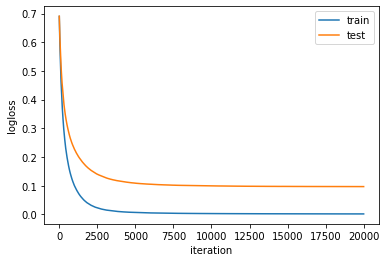

In [88]:
from matplotlib import pyplot
# create line plots of metrics for each dataset
pyplot.plot(results['validation_0']['logloss'],label='train')
pyplot.plot(results['validation_1']['logloss'],label= 'test')

# Show the legend
pyplot.xlabel('iteration')
pyplot.ylabel('logloss')
pyplot.legend()
pyplot.show()